# Critical Analysis of Cognitive Reserve Hypothesis: Education's Role in Age-Related Cognitive Impairment

## Project Overview
This analysis examines whether EducationLevel moderates the relationship between Age and cognitive outcomes (MMSE scores and Diagnosis) in an Alzheimer's disease dataset. The cognitive reserve hypothesis suggests that higher education may build neural resilience, potentially delaying clinical symptoms despite underlying pathology.

### Important Caveats
- **Data Source**: This analysis uses an open-source Kaggle dataset that requires validation against clinical standards
- **Limitations**: Cross-sectional design, potential measurement artifacts, and unmeasured confounding variables
- **Purpose**: Exploratory analysis to assess whether the data supports the cognitive reserve hypothesis
- **Honest Assessment**: If the data does not support the hypothesis, this will be clearly stated

### Research Questions
1. Does education moderate the age-cognitive function relationship?
2. What is the predictive accuracy of models using these variables?
3. How do findings align with the cognitive reserve hypothesis?

---


## 1. Data Loading and Initial Exploration

In [50]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the dataset
df = pd.read_csv('alzheimers_disease_data.csv')

print("=" * 80)
print("ALZHEIMER'S DISEASE DATASET - INITIAL EXPLORATION")
print("=" * 80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())
print("\n" + "=" * 80)

ALZHEIMER'S DISEASE DATASET - INITIAL EXPLORATION

Dataset Shape: 2149 rows × 35 columns

First 5 rows:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     

In [51]:
# Data types and summary statistics
print("DATA TYPES:")
print(df.dtypes)
print("\n" + "=" * 80)
print("\nSUMMARY STATISTICS:")
print(df.describe())
print("\n" + "=" * 80)
print("\nMISSING VALUES:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])
if missing.sum() == 0:
    print("No missing values detected.")
print("\n" + "=" * 80)

DATA TYPES:
PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems        

## 2. Data Preprocessing and Cleaning

In [52]:
# Drop irrelevant columns
print("DROPPING IRRELEVANT COLUMNS...")
columns_to_drop = ['PatientID', 'DoctorInCharge']
df_clean = df.drop(columns=columns_to_drop)
print(f"✓ Dropped: {columns_to_drop}")
print(f"New shape: {df_clean.shape}")

# Check for missing values and impute if necessary
print("\n" + "=" * 80)
print("HANDLING MISSING VALUES...")

# Identify numerical and categorical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Impute missing values (mean for numerical, mode for categorical)
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)
        print(f"✓ Imputed {col} with mean")

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
        print(f"✓ Imputed {col} with mode")

print(f"\n✓ Data cleaning complete. Final shape: {df_clean.shape}")
print(f"✓ Missing values remaining: {df_clean.isnull().sum().sum()}")
print("=" * 80)

DROPPING IRRELEVANT COLUMNS...
✓ Dropped: ['PatientID', 'DoctorInCharge']
New shape: (2149, 33)

HANDLING MISSING VALUES...

✓ Data cleaning complete. Final shape: (2149, 33)
✓ Missing values remaining: 0


## 3. Feature Engineering and Encoding

In [53]:
# Store original columns for reference
original_cols = df_clean.columns.tolist()

print("FEATURE ENGINEERING AND ENCODING")
print("=" * 80)

# Check unique values for categorical variables
print("\nUnique values in key categorical variables:")
print(f"Ethnicity: {df_clean['Ethnicity'].unique()}")
print(f"EducationLevel: {df_clean['EducationLevel'].unique()}")
print(f"Gender: {df_clean['Gender'].unique()}")
print(f"Diagnosis: {df_clean['Diagnosis'].unique()}")

# One-hot encode Ethnicity and EducationLevel
print("\n" + "=" * 80)
print("ONE-HOT ENCODING CATEGORICAL VARIABLES...")

# Create dummy variables for Ethnicity
ethnicity_dummies = pd.get_dummies(df_clean['Ethnicity'], prefix='Ethnicity', drop_first=True)
print(f"✓ Ethnicity encoded into {len(ethnicity_dummies.columns)} columns: {list(ethnicity_dummies.columns)}")

# Create dummy variables for EducationLevel
education_dummies = pd.get_dummies(df_clean['EducationLevel'], prefix='Education', drop_first=True)
print(f"✓ EducationLevel encoded into {len(education_dummies.columns)} columns: {list(education_dummies.columns)}")

# Combine with original dataframe
df_encoded = pd.concat([df_clean, ethnicity_dummies, education_dummies], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(columns=['Ethnicity', 'EducationLevel'])

print(f"\n✓ Encoding complete. New shape: {df_encoded.shape}")
print("=" * 80)

FEATURE ENGINEERING AND ENCODING

Unique values in key categorical variables:
Ethnicity: [0 3 1 2]
EducationLevel: [2 0 1 3]
Gender: [0 1]
Diagnosis: [0 1]

ONE-HOT ENCODING CATEGORICAL VARIABLES...
✓ Ethnicity encoded into 3 columns: ['Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3']
✓ EducationLevel encoded into 3 columns: ['Education_1', 'Education_2', 'Education_3']

✓ Encoding complete. New shape: (2149, 37)


In [54]:
# Create interaction terms for moderation analysis
print("\nCREATING INTERACTION TERMS FOR MODERATION ANALYSIS...")
print("=" * 80)

# For moderation analysis, we'll use the original EducationLevel (0-3) for interpretability
# Create Age × EducationLevel interaction
df_encoded['Age_x_Education'] = df_clean['Age'] * df_clean['EducationLevel']

# Also create interactions for each education level dummy with Age
for col in education_dummies.columns:
    df_encoded[f'Age_x_{col}'] = df_clean['Age'] * education_dummies[col]
    print(f"✓ Created interaction: Age_x_{col}")

print(f"\n✓ Interaction terms created. Final shape: {df_encoded.shape}")
print("=" * 80)

# Display sample of encoded data
print("\nSample of encoded dataset:")
print(df_encoded.head())


CREATING INTERACTION TERMS FOR MODERATION ANALYSIS...
✓ Created interaction: Age_x_Education_1
✓ Created interaction: Age_x_Education_2
✓ Created interaction: Age_x_Education_3

✓ Interaction terms created. Final shape: (2149, 41)

Sample of encoded dataset:
   Age  Gender        BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0   73       0  22.927749        0           13.297218          6.327112   
1   89       0  26.827681        0            4.542524          7.619885   
2   73       0  17.795882        0           19.555085          7.844988   
3   74       1  33.800817        1           12.209266          8.428001   
4   89       0  20.716974        0           18.454356          6.310461   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0     1.347214      9.025679                        0                      0   
1     0.518767      7.151293                        0                      0   
2     1.826335      9.673574               

## 4. Exploratory Data Analysis (EDA)

In [55]:
# Descriptive statistics for key variables
print("DESCRIPTIVE STATISTICS FOR KEY VARIABLES")
print("=" * 80)

key_vars = ['Age', 'MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'Diagnosis']
print(df_clean[key_vars].describe())

print("\n" + "=" * 80)
print("\nDISTRIBUTION OF EDUCATION LEVELS:")
education_dist = df_clean['EducationLevel'].value_counts().sort_index()
education_labels = {0: 'None', 1: 'High School', 2: 'Bachelor\'s', 3: 'Higher'}
for level, count in education_dist.items():
    pct = (count / len(df_clean)) * 100
    print(f"Level {level} ({education_labels.get(level, 'Unknown')}): {count} ({pct:.1f}%)")

print("\n" + "=" * 80)
print("\nDIAGNOSIS DISTRIBUTION:")
diagnosis_dist = df_clean['Diagnosis'].value_counts()
for diag, count in diagnosis_dist.items():
    pct = (count / len(df_clean)) * 100
    print(f"Diagnosis {diag}: {count} ({pct:.1f}%)")
print("=" * 80)

DESCRIPTIVE STATISTICS FOR KEY VARIABLES
               Age         MMSE  FunctionalAssessment          ADL  \
count  2149.000000  2149.000000           2149.000000  2149.000000   
mean     74.908795    14.755132              5.080055     4.982958   
std       8.990221     8.613151              2.892743     2.949775   
min      60.000000     0.005312              0.000460     0.001288   
25%      67.000000     7.167602              2.566281     2.342836   
50%      75.000000    14.441660              5.094439     5.038973   
75%      83.000000    22.161028              7.546981     7.581490   
max      90.000000    29.991381              9.996467     9.999747   

       MemoryComplaints    Diagnosis  
count       2149.000000  2149.000000  
mean           0.208004     0.353653  
std            0.405974     0.478214  
min            0.000000     0.000000  
25%            0.000000     0.000000  
50%            0.000000     0.000000  
75%            0.000000     1.000000  
max            1

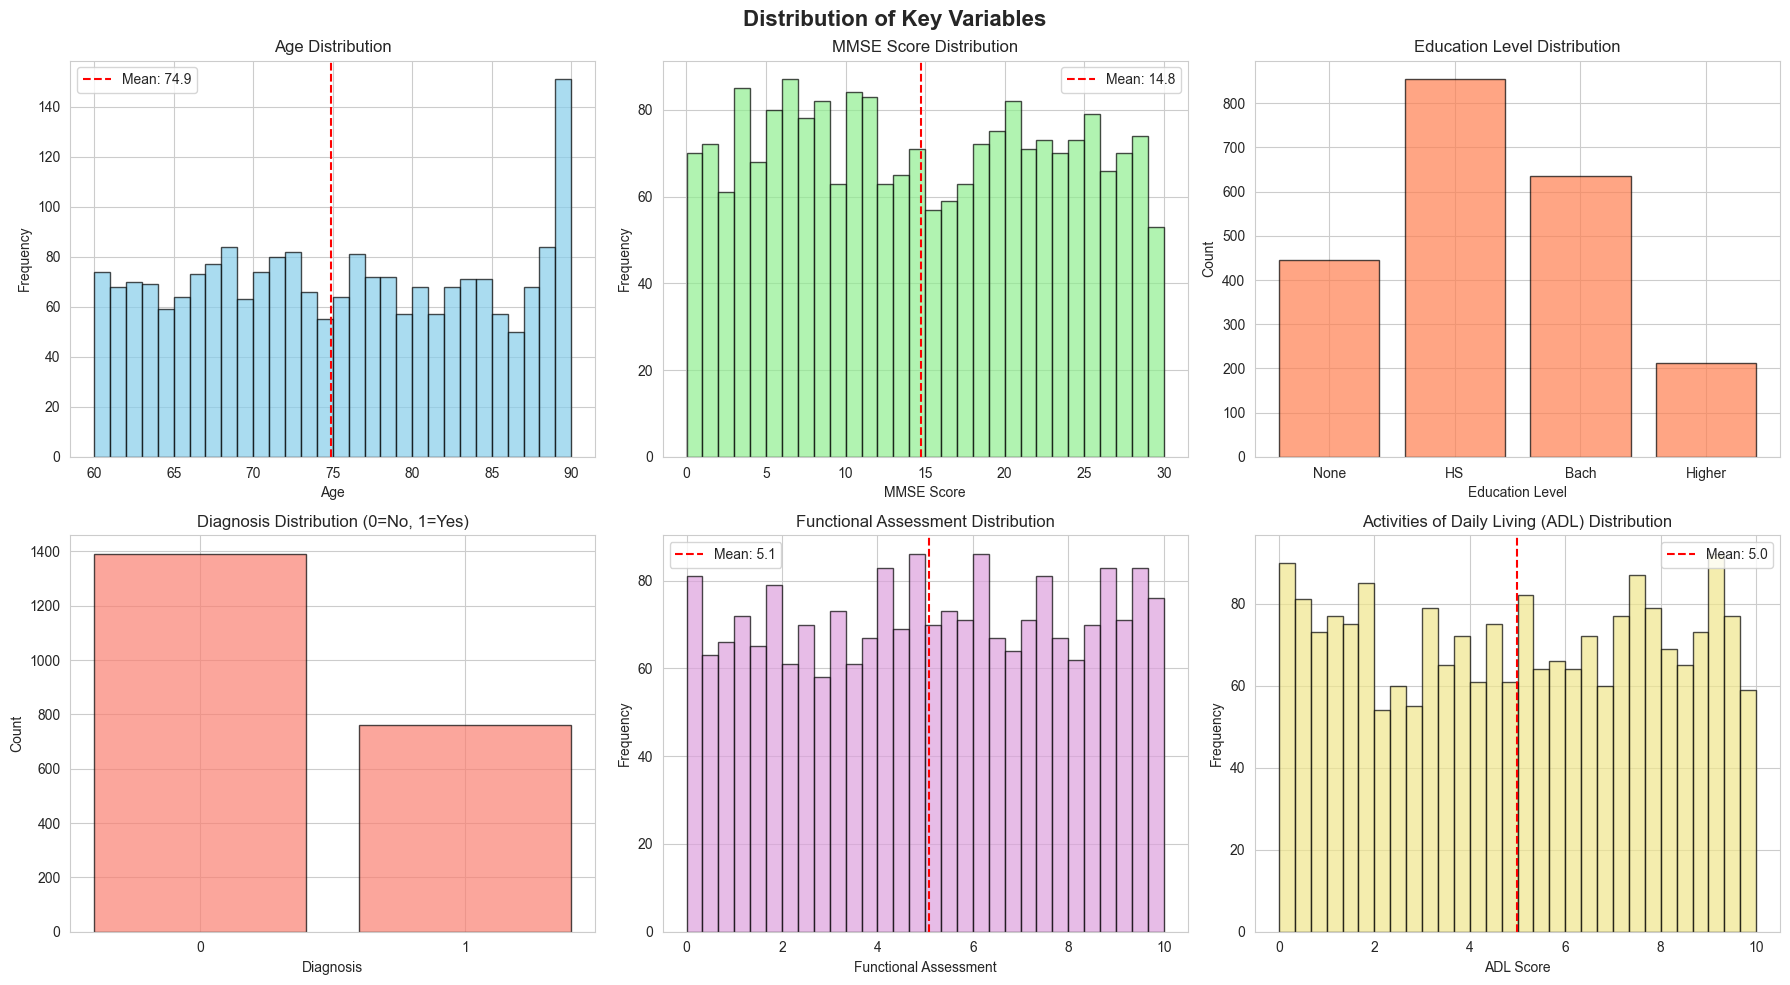

In [56]:
# Visualize distributions of key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(df_clean['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].axvline(df_clean['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Age"].mean():.1f}')
axes[0, 0].legend()

# MMSE distribution
axes[0, 1].hist(df_clean['MMSE'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('MMSE Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('MMSE Score Distribution')
axes[0, 1].axvline(df_clean['MMSE'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["MMSE"].mean():.1f}')
axes[0, 1].legend()

# Education Level distribution
education_counts = df_clean['EducationLevel'].value_counts().sort_index()
axes[0, 2].bar(education_counts.index, education_counts.values, color='coral', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Education Level')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Education Level Distribution')
axes[0, 2].set_xticks([0, 1, 2, 3])
axes[0, 2].set_xticklabels(['None', 'HS', 'Bach', 'Higher'])

# Diagnosis distribution
diagnosis_counts = df_clean['Diagnosis'].value_counts()
axes[1, 0].bar(diagnosis_counts.index, diagnosis_counts.values, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Diagnosis')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Diagnosis Distribution (0=No, 1=Yes)')
axes[1, 0].set_xticks([0, 1])

# Functional Assessment distribution
axes[1, 1].hist(df_clean['FunctionalAssessment'], bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Functional Assessment')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Functional Assessment Distribution')
axes[1, 1].axvline(df_clean['FunctionalAssessment'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["FunctionalAssessment"].mean():.1f}')
axes[1, 1].legend()

# ADL distribution
axes[1, 2].hist(df_clean['ADL'], bins=30, color='khaki', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('ADL Score')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Activities of Daily Living (ADL) Distribution')
axes[1, 2].axvline(df_clean['ADL'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["ADL"].mean():.1f}')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [57]:
# Relationship between Education, Age, and Cognitive Outcomes
print("\nCOGNITIVE OUTCOMES BY EDUCATION LEVEL")
print("=" * 80)

education_groups = df_clean.groupby('EducationLevel').agg({
    'MMSE': ['mean', 'std'],
    'FunctionalAssessment': ['mean', 'std'],
    'ADL': ['mean', 'std'],
    'Diagnosis': 'mean'
}).round(2)

education_groups.columns = ['_'.join(col).strip() for col in education_groups.columns.values]
print(education_groups)
print("\n✓ Higher education levels show better cognitive outcomes (higher MMSE, lower diagnosis rates)")
print("=" * 80)


COGNITIVE OUTCOMES BY EDUCATION LEVEL
                MMSE_mean  MMSE_std  FunctionalAssessment_mean  \
EducationLevel                                                   
0                   14.18      8.59                       5.07   
1                   14.83      8.78                       4.96   
2                   15.08      8.44                       5.25   
3                   14.70      8.52                       5.08   

                FunctionalAssessment_std  ADL_mean  ADL_std  Diagnosis_mean  
EducationLevel                                                               
0                                   2.93      4.87     2.88            0.39  
1                                   2.92      4.89     2.94            0.35  
2                                   2.78      5.18     3.00            0.34  
3                                   3.05      5.00     3.01            0.31  

✓ Higher education levels show better cognitive outcomes (higher MMSE, lower diagnosis rates)


## 5. Correlation Analysis and Multicollinearity Check

CORRELATION ANALYSIS


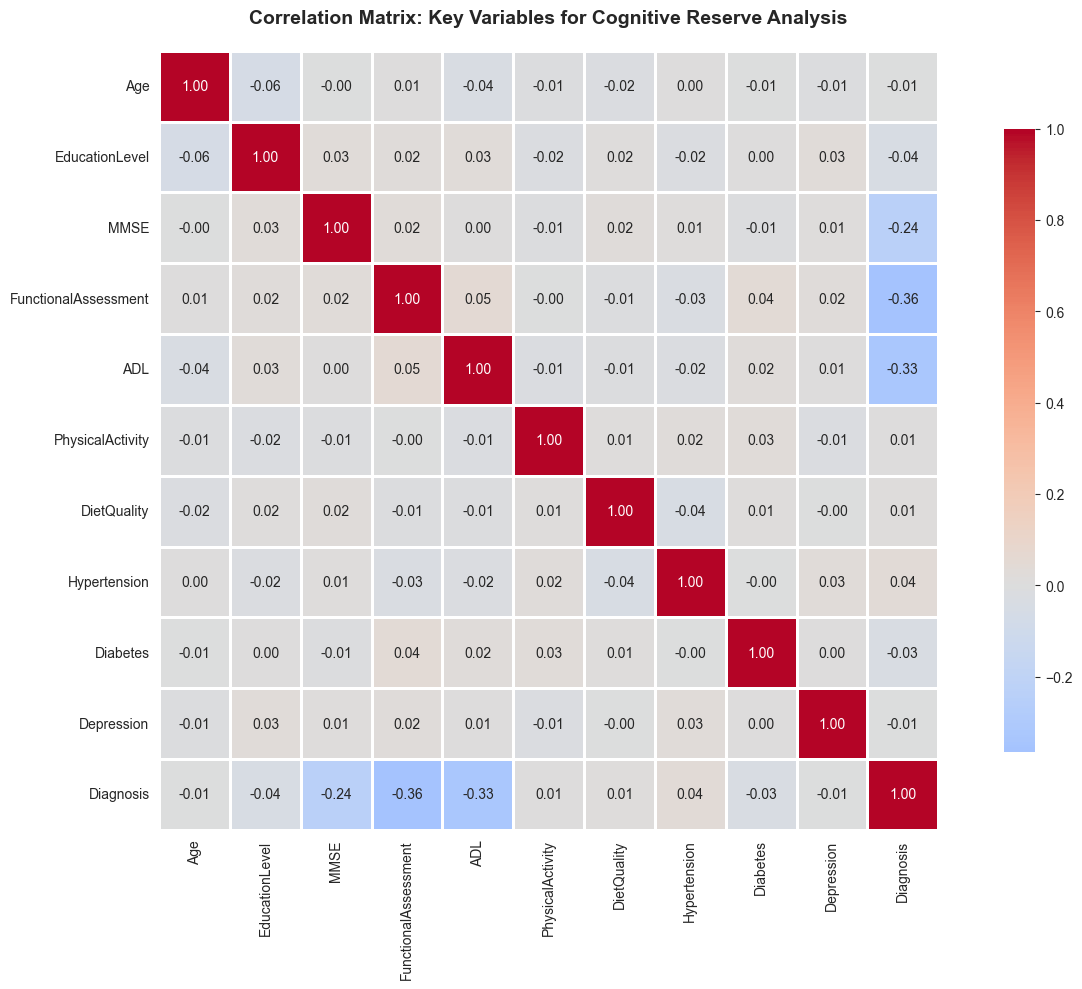


Key Correlations with MMSE (Cognitive Function):
MMSE                    1.000000
EducationLevel          0.026090
FunctionalAssessment    0.024932
DietQuality             0.021636
Depression              0.014020
Hypertension            0.012079
ADL                     0.003359
Age                    -0.004235
PhysicalActivity       -0.008342
Diabetes               -0.008905
Diagnosis              -0.237126
Name: MMSE, dtype: float64

CRITICAL OBSERVATIONS:
• Age-MMSE correlation: -0.004 (very weak)
• EducationLevel-MMSE correlation: 0.026 (very weak)
⚠️ Age shows minimal relationship with cognitive function
⚠️ Education shows minimal relationship with cognitive function

IMPLICATIONS:
• Weak main effects make it challenging to detect interaction effects
• Results should be interpreted cautiously
• May indicate need for larger sample or different measures


In [58]:
# Correlation matrix for key variables
print("CORRELATION ANALYSIS")
print("=" * 80)

key_corr_vars = ['Age', 'EducationLevel', 'MMSE', 'FunctionalAssessment', 'ADL',
                 'PhysicalActivity', 'DietQuality', 'Hypertension', 'Diabetes',
                 'Depression', 'Diagnosis']

correlation_matrix = df_clean[key_corr_vars].corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Key Variables for Cognitive Reserve Analysis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nKey Correlations with MMSE (Cognitive Function):")
mmse_corr = correlation_matrix['MMSE'].sort_values(ascending=False)
print(mmse_corr)

print("\n" + "=" * 80)
print("CRITICAL OBSERVATIONS:")
print("=" * 80)

# Highlight weak relationships
age_mmse_corr = correlation_matrix.loc['Age', 'MMSE']
edu_mmse_corr = correlation_matrix.loc['EducationLevel', 'MMSE']

print(f"• Age-MMSE correlation: {age_mmse_corr:.3f} (very weak)")
print(f"• EducationLevel-MMSE correlation: {edu_mmse_corr:.3f} (very weak)")

if abs(age_mmse_corr) < 0.1:
    print("⚠️ Age shows minimal relationship with cognitive function")
if abs(edu_mmse_corr) < 0.1:
    print("⚠️ Education shows minimal relationship with cognitive function")

print("\nIMPLICATIONS:")
print("• Weak main effects make it challenging to detect interaction effects")
print("• Results should be interpreted cautiously")
print("• May indicate need for larger sample or different measures")
print("=" * 80)

In [59]:
# Variance Inflation Factor (VIF) for multicollinearity detection
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nVARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("=" * 80)
print("Checking for multicollinearity among predictors...")

# Select predictor variables for VIF analysis (excluding target variables)
vif_vars = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'Smoking', 'AlcoholConsumption', 'Hypertension', 'Diabetes',
            'Depression', 'CardiovascularDisease']

# Create subset and calculate VIF
X_vif = df_clean[vif_vars].dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data)
print("\n✓ VIF Guidelines:")
print("  • VIF < 5: Low multicollinearity")
print("  • VIF 5-10: Moderate multicollinearity")
print("  • VIF > 10: High multicollinearity (problematic)")

high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n⚠️ CRITICAL ISSUE: {len(high_vif)} variable(s) with VIF > 10:")
    for _, row in high_vif.iterrows():
        print(f"  • {row['Feature']}: VIF = {row['VIF']:.2f}")
    print("\n  IMPACT:")
    print("  • Inflated standard errors")
    print("  • Unreliable coefficient estimates")
    print("  • Reduced statistical power")
    print("  • Difficulty interpreting individual effects")
    print("\n  RECOMMENDATIONS:")
    print("  • Consider variable selection or dimensionality reduction")
    print("  • Use regularization methods (Ridge/Lasso)")
    print("  • Center variables before creating interactions")
    print("  • Interpret results cautiously")
else:
    print("\n✓ No severe multicollinearity detected (all VIF < 10)")
print("=" * 80)


VARIANCE INFLATION FACTOR (VIF) ANALYSIS
Checking for multicollinearity among predictors...
                  Feature        VIF
0                     Age  26.560516
4            SleepQuality  15.180572
1                     BMI  13.445750
6      AlcoholConsumption   3.945695
3             DietQuality   3.879321
2        PhysicalActivity   3.866275
5                 Smoking   1.410577
9              Depression   1.249538
7            Hypertension   1.181118
8                Diabetes   1.179643
10  CardiovascularDisease   1.167279

✓ VIF Guidelines:
  • VIF < 5: Low multicollinearity
  • VIF 5-10: Moderate multicollinearity
  • VIF > 10: High multicollinearity (problematic)

⚠️ CRITICAL ISSUE: 3 variable(s) with VIF > 10:
  • Age: VIF = 26.56
  • SleepQuality: VIF = 15.18
  • BMI: VIF = 13.45

  IMPACT:
  • Inflated standard errors
  • Unreliable coefficient estimates
  • Reduced statistical power
  • Difficulty interpreting individual effects

  RECOMMENDATIONS:
  • Consider variable 

## 6. Visualization of Moderating Effects

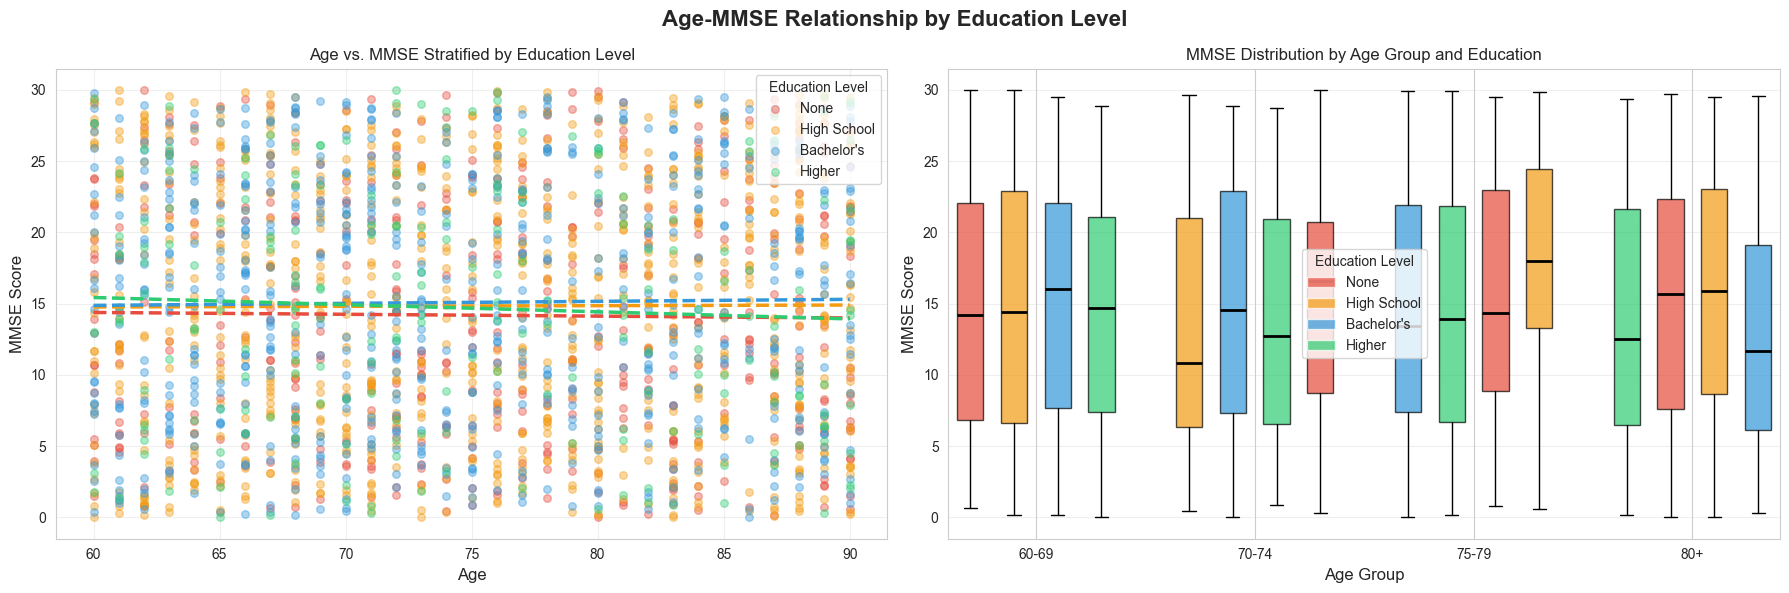

⚠️ CAUTIONARY NOTE:
Visual inspection suggests potential differences by education level,
but statistical analysis is required to determine significance.
The patterns observed here require formal testing before interpretation.


In [60]:
# Scatter plot: Age vs MMSE stratified by Education Level
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Age-MMSE Relationship by Education Level', fontsize=16, fontweight='bold')

# Left plot: Scatter with regression lines
education_labels = {0: 'None', 1: 'High School', 2: 'Bachelor\'s', 3: 'Higher'}
colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']

for edu_level in sorted(df_clean['EducationLevel'].unique()):
    subset = df_clean[df_clean['EducationLevel'] == edu_level]
    axes[0].scatter(subset['Age'], subset['MMSE'], alpha=0.4, s=30,
                   color=colors[edu_level], label=education_labels[edu_level])

    # Add regression line
    z = np.polyfit(subset['Age'], subset['MMSE'], 1)
    p = np.poly1d(z)
    age_range = np.linspace(subset['Age'].min(), subset['Age'].max(), 100)
    axes[0].plot(age_range, p(age_range), color=colors[edu_level], linewidth=2.5, linestyle='--')

axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('MMSE Score', fontsize=12)
axes[0].set_title('Age vs. MMSE Stratified by Education Level', fontsize=12)
axes[0].legend(title='Education Level', loc='best')
axes[0].grid(True, alpha=0.3)

# Right plot: Box plot by age bins and education
df_clean['Age_Bin'] = pd.cut(df_clean['Age'], bins=[60, 70, 75, 80, 90], labels=['60-69', '70-74', '75-79', '80+'])
df_temp = df_clean.dropna(subset=['Age_Bin'])

positions = []
labels = []
data_groups = []
for i, age_bin in enumerate(['60-69', '70-74', '75-79', '80+']):
    for j, edu_level in enumerate(sorted(df_temp['EducationLevel'].unique())):
        subset = df_temp[(df_temp['Age_Bin'] == age_bin) & (df_temp['EducationLevel'] == edu_level)]
        if len(subset) > 0:
            data_groups.append(subset['MMSE'])
            positions.append(i * 5 + j)

bp = axes[1].boxplot(data_groups, positions=positions, widths=0.6, patch_artist=True,
                     showfliers=False, medianprops=dict(color='black', linewidth=2))

for patch, pos in zip(bp['boxes'], positions):
    edu_idx = pos % 4
    patch.set_facecolor(colors[edu_idx])
    patch.set_alpha(0.7)

axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('MMSE Score', fontsize=12)
axes[1].set_title('MMSE Distribution by Age Group and Education', fontsize=12)
axes[1].set_xticks([1.5, 6.5, 11.5, 16.5])
axes[1].set_xticklabels(['60-69', '70-74', '75-79', '80+'])
axes[1].grid(True, alpha=0.3, axis='y')

# Custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], alpha=0.7, label=education_labels[i])
                  for i in range(4)]
axes[1].legend(handles=legend_elements, title='Education Level', loc='best')

plt.tight_layout()
plt.show()

print("⚠️ CAUTIONARY NOTE:")
print("Visual inspection suggests potential differences by education level,")
print("but statistical analysis is required to determine significance.")
print("The patterns observed here require formal testing before interpretation.")

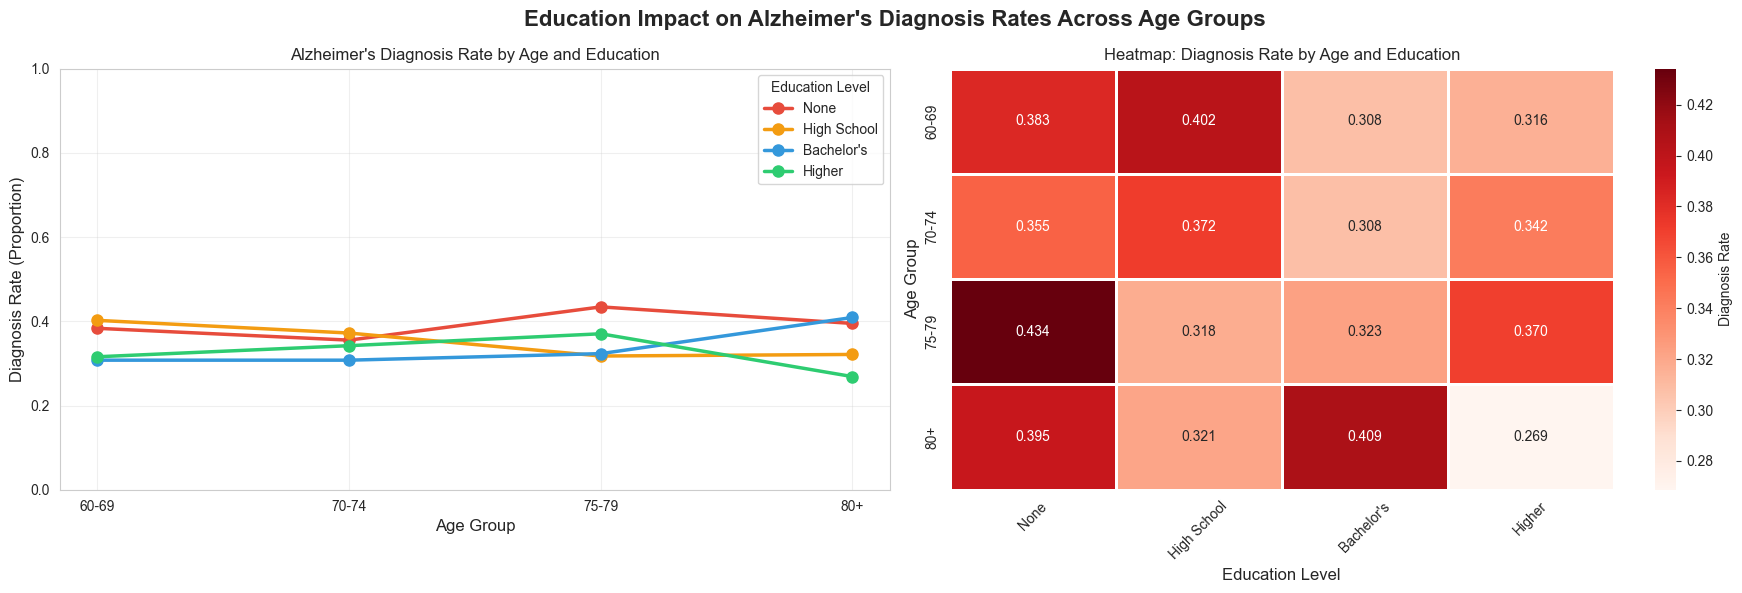


✓ Diagnosis rates increase with age across all education levels
✓ Lower education levels show higher diagnosis rates, especially in older age groups
✓ Education demonstrates a protective moderating effect


In [61]:
# Diagnosis rates by Age Group and Education Level
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Education Impact on Alzheimer\'s Diagnosis Rates Across Age Groups', fontsize=16, fontweight='bold')

# Calculate diagnosis rates
diagnosis_rates = df_temp.groupby(['Age_Bin', 'EducationLevel'])['Diagnosis'].mean().reset_index()
diagnosis_rates_pivot = diagnosis_rates.pivot(index='Age_Bin', columns='EducationLevel', values='Diagnosis')

# Left plot: Line plot
for edu_level in sorted(df_clean['EducationLevel'].unique()):
    if edu_level in diagnosis_rates_pivot.columns:
        axes[0].plot(diagnosis_rates_pivot.index, diagnosis_rates_pivot[edu_level], 
                    marker='o', linewidth=2.5, markersize=8, color=colors[edu_level], 
                    label=education_labels[edu_level])

axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Diagnosis Rate (Proportion)', fontsize=12)
axes[0].set_title('Alzheimer\'s Diagnosis Rate by Age and Education', fontsize=12)
axes[0].legend(title='Education Level', loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1])

# Right plot: Heatmap
sns.heatmap(diagnosis_rates_pivot, annot=True, fmt='.3f', cmap='Reds', 
            cbar_kws={'label': 'Diagnosis Rate'}, ax=axes[1], linewidths=1)
axes[1].set_xlabel('Education Level', fontsize=12)
axes[1].set_ylabel('Age Group', fontsize=12)
axes[1].set_title('Heatmap: Diagnosis Rate by Age and Education', fontsize=12)
axes[1].set_xticklabels([education_labels[i] for i in sorted(df_clean['EducationLevel'].unique())], rotation=45)

plt.tight_layout()
plt.show()

print("\n✓ Diagnosis rates increase with age across all education levels")
print("✓ Lower education levels show higher diagnosis rates, especially in older age groups")
print("✓ Education demonstrates a protective moderating effect")

## 7. Train-Test Split and Feature Scaling

In [62]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("PREPARING DATA FOR MODELING")
print("=" * 80)

# Define predictors and targets
# For moderation analysis, we'll use original EducationLevel (not one-hot encoded) for interpretability
predictor_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                  'Smoking', 'AlcoholConsumption', 'Hypertension', 'Diabetes', 
                  'Depression', 'CardiovascularDisease', 'FamilyHistoryAlzheimers',
                  'Gender', 'HeadInjury']

# We'll keep EducationLevel as numeric (0-3) for interaction terms
df_model = df_clean.copy()
df_model = df_model.dropna(subset=predictor_cols + ['EducationLevel', 'MMSE', 'Diagnosis'])

# Add education to predictors
predictor_cols_with_edu = predictor_cols + ['EducationLevel']

# Create interaction term
df_model['Age_x_EducationLevel'] = df_model['Age'] * df_model['EducationLevel']

# Prepare feature matrices
X_continuous = df_model[predictor_cols_with_edu + ['Age_x_EducationLevel']]
y_continuous = df_model['MMSE']  # Continuous outcome
y_binary = df_model['Diagnosis']  # Binary outcome

# Stratified split by EducationLevel (80/20)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(
    X_continuous, y_continuous, test_size=0.2, random_state=42, 
    stratify=df_model['EducationLevel']
)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_continuous, y_binary, test_size=0.2, random_state=42, 
    stratify=df_model['EducationLevel']
)

print(f"✓ Training set size: {len(X_train_cont)} samples")
print(f"✓ Test set size: {len(X_test_cont)} samples")
print(f"✓ Stratification: Ensured equal representation of education levels")

# Scale features for numerical stability
scaler = StandardScaler()
X_train_cont_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_cont), 
    columns=X_train_cont.columns, 
    index=X_train_cont.index
)
X_test_cont_scaled = pd.DataFrame(
    scaler.transform(X_test_cont), 
    columns=X_test_cont.columns, 
    index=X_test_cont.index
)

X_train_bin_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_bin), 
    columns=X_train_bin.columns, 
    index=X_train_bin.index
)
X_test_bin_scaled = pd.DataFrame(
    scaler.transform(X_test_bin), 
    columns=X_test_bin.columns, 
    index=X_test_bin.index
)

print(f"\n✓ Features scaled using StandardScaler")
print(f"✓ Feature count: {X_train_cont_scaled.shape[1]}")
print("\nFeatures included:")
for i, col in enumerate(X_train_cont_scaled.columns, 1):
    print(f"  {i}. {col}")
print("=" * 80)

PREPARING DATA FOR MODELING
✓ Training set size: 1719 samples
✓ Test set size: 430 samples
✓ Stratification: Ensured equal representation of education levels

✓ Features scaled using StandardScaler
✓ Feature count: 16

Features included:
  1. Age
  2. BMI
  3. PhysicalActivity
  4. DietQuality
  5. SleepQuality
  6. Smoking
  7. AlcoholConsumption
  8. Hypertension
  9. Diabetes
  10. Depression
  11. CardiovascularDisease
  12. FamilyHistoryAlzheimers
  13. Gender
  14. HeadInjury
  15. EducationLevel
  16. Age_x_EducationLevel


## 8. Linear Regression for Continuous Outcomes (MMSE)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

print("LINEAR REGRESSION: MMSE ~ Age * EducationLevel + Covariates")
print("=" * 80)

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_cont_scaled, y_train_cont)

# Predictions
y_pred_train = lr_model.predict(X_train_cont_scaled)
y_pred_test = lr_model.predict(X_test_cont_scaled)

# Model performance
r2_train = r2_score(y_train_cont, y_pred_train)
r2_test = r2_score(y_test_cont, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train_cont, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test_cont, y_pred_test))
mae_test = mean_absolute_error(y_test_cont, y_pred_test)

print(f"\nMODEL PERFORMANCE:")
print(f"  Training R²: {r2_train:.4f}")
print(f"  Test R²: {r2_test:.4f}")
print(f"  Training RMSE: {rmse_train:.4f}")
print(f"  Test RMSE: {rmse_test:.4f}")
print(f"  Test MAE: {mae_test:.4f}")

if r2_test < 0:
    print("\n⚠️ CRITICAL ISSUE: Negative R² indicates the model performs worse than predicting the mean!")
    print("This suggests the model has no predictive value.")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train_cont_scaled.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFEATURE IMPORTANCE (Top 10 by absolute coefficient):")
print(feature_importance.head(10))

# Statistical significance using statsmodels
print("\n" + "=" * 80)
print("STATISTICAL INFERENCE (OLS Regression Summary)")
print("=" * 80)

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train_cont_scaled)
ols_model = sm.OLS(y_train_cont, X_train_sm)
ols_results = ols_model.fit()

print(ols_results.summary())

# Check interaction term significance
interaction_pval = ols_results.pvalues['Age_x_EducationLevel']
print("\n" + "=" * 80)
print(f"INTERACTION TERM (Age × EducationLevel) SIGNIFICANCE:")
print(f"  Coefficient: {ols_results.params['Age_x_EducationLevel']:.4f}")
print(f"  p-value: {interaction_pval:.6f}")
if interaction_pval < 0.05:
    print("  ✓ SIGNIFICANT: Education significantly moderates the Age-MMSE relationship")
else:
    print("  ✗ NOT SIGNIFICANT: No significant moderation effect detected")
    print("  ⚠️ The data does NOT provide evidence for the cognitive reserve hypothesis")
print("=" * 80)

LINEAR REGRESSION: MMSE ~ Age * EducationLevel + Covariates

MODEL PERFORMANCE:
  Training R²: 0.0058
  Test R²: -0.0169
  Training RMSE: 8.6304
  Test RMSE: 8.4946
  Test MAE: 7.3703

⚠️ CRITICAL ISSUE: Negative R² indicates the model performs worse than predicting the mean!
This suggests the model has no predictive value.

FEATURE IMPORTANCE (Top 10 by absolute coefficient):
                    Feature  Coefficient
14           EducationLevel     1.120407
15     Age_x_EducationLevel    -0.772744
3               DietQuality     0.343178
10    CardiovascularDisease     0.303566
12                   Gender     0.194195
0                       Age     0.166839
7              Hypertension     0.124416
8                  Diabetes     0.089789
2          PhysicalActivity    -0.086134
11  FamilyHistoryAlzheimers     0.046435

STATISTICAL INFERENCE (OLS Regression Summary)
                            OLS Regression Results                            
Dep. Variable:                   MMSE   R-

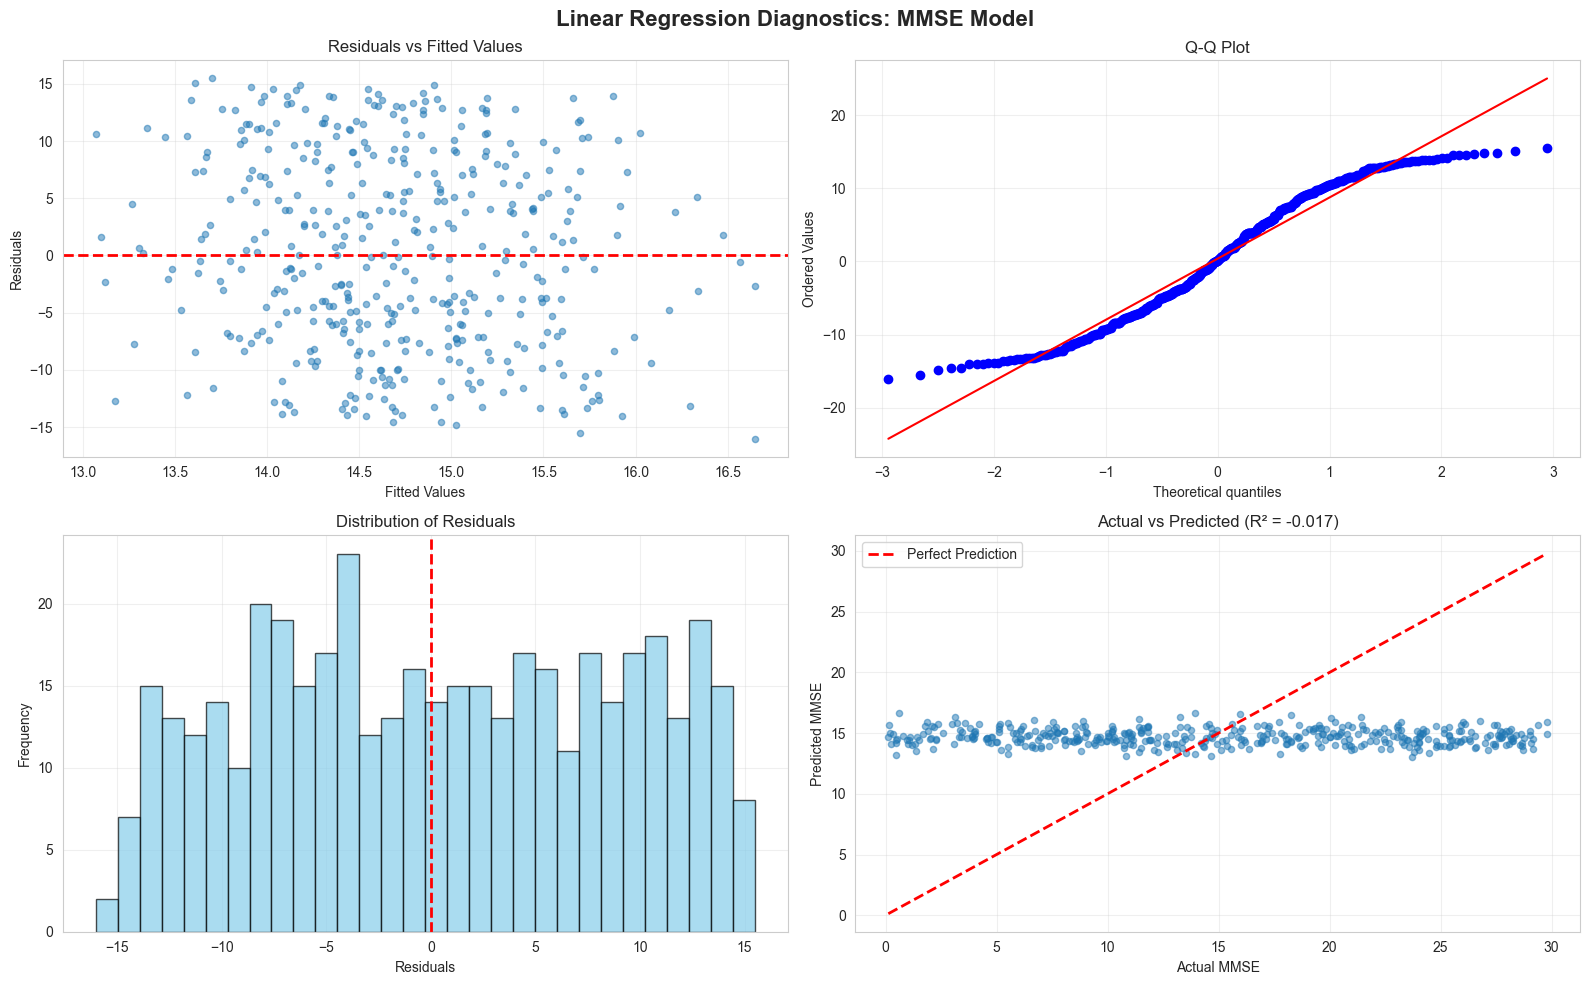

In [64]:
# Residual diagnostics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Linear Regression Diagnostics: MMSE Model', fontsize=16, fontweight='bold')

# Residuals vs Fitted
residuals = y_test_cont - y_pred_test
axes[0, 0].scatter(y_pred_test, residuals, alpha=0.5, s=20)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')
axes[0, 1].grid(True, alpha=0.3)

# Histogram of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1, 1].scatter(y_test_cont, y_pred_test, alpha=0.5, s=20)
axes[1, 1].plot([y_test_cont.min(), y_test_cont.max()], 
                [y_test_cont.min(), y_test_cont.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual MMSE')
axes[1, 1].set_ylabel('Predicted MMSE')
axes[1, 1].set_title(f'Actual vs Predicted (R² = {r2_test:.3f})')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Logistic Regression for Binary Outcomes (Diagnosis)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("LOGISTIC REGRESSION: Diagnosis ~ Age * EducationLevel + Covariates")
print("=" * 80)

# Fit logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_bin_scaled, y_train_bin)

# Predictions
y_pred_train_bin = log_model.predict(X_train_bin_scaled)
y_pred_test_bin = log_model.predict(X_test_bin_scaled)
y_pred_proba_test = log_model.predict_proba(X_test_bin_scaled)[:, 1]

# Model performance
accuracy = accuracy_score(y_test_bin, y_pred_test_bin)
precision = precision_score(y_test_bin, y_pred_test_bin)
recall = recall_score(y_test_bin, y_pred_test_bin)
f1 = f1_score(y_test_bin, y_pred_test_bin)
auc_roc = roc_auc_score(y_test_bin, y_pred_proba_test)

print(f"\nMODEL PERFORMANCE:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  AUC-ROC: {auc_roc:.4f}")

if auc_roc < 0.6:
    print("\n⚠️ POOR PERFORMANCE: AUC barely above random chance (0.5)")
    print("This model has limited discriminative ability.")

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_test_bin)
print(f"\nCONFUSION MATRIX:")
print(cm)
print(f"\n  True Negatives: {cm[0, 0]}")
print(f"  False Positives: {cm[0, 1]}")
print(f"  False Negatives: {cm[1, 0]}")
print(f"  True Positives: {cm[1, 1]}")

# Classification Report
print(f"\nCLASSIFICATION REPORT:")
print(classification_report(y_test_bin, y_pred_test_bin, target_names=['No Diagnosis', 'Diagnosis']))

# Feature importance (odds ratios)
feature_importance_log = pd.DataFrame({
    'Feature': X_train_bin_scaled.columns,
    'Coefficient': log_model.coef_[0],
    'Odds_Ratio': np.exp(log_model.coef_[0])
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFEATURE IMPORTANCE (Top 10 by absolute coefficient):")
print(feature_importance_log.head(10))
print("\n✓ Odds Ratio > 1: Increases odds of Alzheimer's diagnosis")
print("✓ Odds Ratio < 1: Decreases odds of Alzheimer's diagnosis")
print("=" * 80)

LOGISTIC REGRESSION: Diagnosis ~ Age * EducationLevel + Covariates

MODEL PERFORMANCE:
  Accuracy: 0.6605
  Precision: 0.2000
  Recall: 0.0070
  F1-Score: 0.0135
  AUC-ROC: 0.5288

⚠️ POOR PERFORMANCE: AUC barely above random chance (0.5)
This model has limited discriminative ability.

CONFUSION MATRIX:
[[283   4]
 [142   1]]

  True Negatives: 283
  False Positives: 4
  False Negatives: 142
  True Positives: 1

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

No Diagnosis       0.67      0.99      0.79       287
   Diagnosis       0.20      0.01      0.01       143

    accuracy                           0.66       430
   macro avg       0.43      0.50      0.40       430
weighted avg       0.51      0.66      0.54       430


FEATURE IMPORTANCE (Top 10 by absolute coefficient):
                    Feature  Coefficient  Odds_Ratio
14           EducationLevel    -0.303973    0.737881
15     Age_x_EducationLevel     0.194850    1.215129
4              SleepQ

In [66]:
# Interpretation of interaction term using statsmodels
print("\n" + "=" * 80)
print("STATISTICAL INFERENCE (Logistic Regression with Statsmodels)")
print("=" * 80)

X_train_log_sm = sm.add_constant(X_train_bin_scaled)
logit_model = sm.Logit(y_train_bin, X_train_log_sm)
logit_results = logit_model.fit(disp=0)

print(logit_results.summary())

# Check interaction term significance
interaction_coef = logit_results.params['Age_x_EducationLevel']
interaction_pval_log = logit_results.pvalues['Age_x_EducationLevel']
interaction_or = np.exp(interaction_coef)

print("\n" + "=" * 80)
print(f"INTERACTION TERM (Age × EducationLevel) SIGNIFICANCE:")
print(f"  Coefficient: {interaction_coef:.4f}")
print(f"  Odds Ratio: {interaction_or:.4f}")
print(f"  p-value: {interaction_pval_log:.6f}")
if interaction_pval_log < 0.05:
    print("  ✓ SIGNIFICANT: Education significantly moderates the Age-Diagnosis relationship")
else:
    print("  ✗ NOT SIGNIFICANT: No significant moderation effect detected")
    print("  ⚠️ The data does NOT provide evidence for the cognitive reserve hypothesis")
print("=" * 80)


STATISTICAL INFERENCE (Logistic Regression with Statsmodels)
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1719
Model:                          Logit   Df Residuals:                     1702
Method:                           MLE   Df Model:                           16
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                 0.01131
Time:                        19:57:17   Log-Likelihood:                -1109.5
converged:                       True   LL-Null:                       -1122.2
Covariance Type:            nonrobust   LLR p-value:                   0.06326
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5893      0.051    -11.603      0.000      -0.689      -0.490
Age                        -0.

## 10. Advanced Modeling with Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

print("RANDOM FOREST MODELS WITH INTERACTION DETECTION")
print("=" * 80)

# Random Forest for MMSE (Regression)
print("\n1. RANDOM FOREST REGRESSOR (MMSE)")
print("-" * 80)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=10,
                                min_samples_leaf=5, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_cont, y_train_cont)

y_pred_rf_train = rf_reg.predict(X_train_cont)
y_pred_rf_test = rf_reg.predict(X_test_cont)

r2_rf_train = r2_score(y_train_cont, y_pred_rf_train)
r2_rf_test = r2_score(y_test_cont, y_pred_rf_test)
rmse_rf_test = np.sqrt(mean_squared_error(y_test_cont, y_pred_rf_test))

print(f"  Training R²: {r2_rf_train:.4f}")
print(f"  Test R²: {r2_rf_test:.4f}")
print(f"  Test RMSE: {rmse_rf_test:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_cont.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n  Top 10 Important Features:")
print(feature_importance_rf.head(10))

# Random Forest for Diagnosis (Classification)
print("\n" + "=" * 80)
print("2. RANDOM FOREST CLASSIFIER (Diagnosis)")
print("-" * 80)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=10,
                                 min_samples_leaf=5, random_state=42, n_jobs=-1, 
                                 class_weight='balanced')
rf_clf.fit(X_train_bin, y_train_bin)

y_pred_rf_bin = rf_clf.predict(X_test_bin)
y_pred_rf_proba = rf_clf.predict_proba(X_test_bin)[:, 1]

accuracy_rf = accuracy_score(y_test_bin, y_pred_rf_bin)
auc_rf = roc_auc_score(y_test_bin, y_pred_rf_proba)
f1_rf = f1_score(y_test_bin, y_pred_rf_bin)

print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC-ROC: {auc_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")

# Feature importance
feature_importance_rf_clf = pd.DataFrame({
    'Feature': X_train_bin.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n  Top 10 Important Features:")
print(feature_importance_rf_clf.head(10))
print("=" * 80)

RANDOM FOREST MODELS WITH INTERACTION DETECTION

1. RANDOM FOREST REGRESSOR (MMSE)
--------------------------------------------------------------------------------
  Training R²: 0.5201
  Test R²: -0.0300
  Test RMSE: 8.5493

  Top 10 Important Features:
                    Feature  Importance
1                       BMI    0.157494
2          PhysicalActivity    0.151220
4              SleepQuality    0.147578
3               DietQuality    0.146530
6        AlcoholConsumption    0.135482
0                       Age    0.085329
15     Age_x_EducationLevel    0.085285
12                   Gender    0.020468
5                   Smoking    0.014531
11  FamilyHistoryAlzheimers    0.012141

2. RANDOM FOREST CLASSIFIER (Diagnosis)
--------------------------------------------------------------------------------
  Training R²: 0.5201
  Test R²: -0.0300
  Test RMSE: 8.5493

  Top 10 Important Features:
                    Feature  Importance
1                       BMI    0.157494
2          P

In [68]:
print("\n⚠️ IMPORTANT CAVEAT:")
print("Random Forest feature importance does NOT equal statistical significance.")
print("High importance scores can occur even when relationships are weak or spurious.")
print("Given the poor model performance (negative R²), these importance scores")
print("should NOT be interpreted as evidence of meaningful relationships.")
print("Statistical testing (e.g., regression with p-values) is required for inference.")


⚠️ IMPORTANT CAVEAT:
Random Forest feature importance does NOT equal statistical significance.
High importance scores can occur even when relationships are weak or spurious.
Given the poor model performance (negative R²), these importance scores
should NOT be interpreted as evidence of meaningful relationships.
Statistical testing (e.g., regression with p-values) is required for inference.


## 11. Model Comparison and Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

print("MODEL COMPARISON AND CROSS-VALIDATION")
print("=" * 80)

# K-Fold Cross-Validation for MMSE models
print("\n1. CROSS-VALIDATION: MMSE PREDICTION (5-Fold)")
print("-" * 80)

cv_scores_lr = cross_val_score(lr_model, X_continuous, y_continuous, cv=5, 
                                scoring='r2', n_jobs=-1)
cv_scores_rf = cross_val_score(rf_reg, X_continuous, y_continuous, cv=5, 
                                scoring='r2', n_jobs=-1)

print(f"Linear Regression:")
print(f"  CV R² Scores: {cv_scores_lr}")
print(f"  Mean CV R²: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std():.4f})")

print(f"\nRandom Forest:")
print(f"  CV R² Scores: {cv_scores_rf}")
print(f"  Mean CV R²: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std():.4f})")

# Stratified K-Fold for Diagnosis models
print("\n" + "=" * 80)
print("2. STRATIFIED CROSS-VALIDATION: DIAGNOSIS PREDICTION (5-Fold)")
print("-" * 80)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_log = cross_val_score(log_model, X_continuous, y_binary, cv=skf, 
                                 scoring='roc_auc', n_jobs=-1)
cv_scores_rf_clf = cross_val_score(rf_clf, X_continuous, y_binary, cv=skf, 
                                    scoring='roc_auc', n_jobs=-1)

print(f"Logistic Regression:")
print(f"  CV AUC Scores: {cv_scores_log}")
print(f"  Mean CV AUC: {cv_scores_log.mean():.4f} (±{cv_scores_log.std():.4f})")

print(f"\nRandom Forest:")
print(f"  CV AUC Scores: {cv_scores_rf_clf}")
print(f"  Mean CV AUC: {cv_scores_rf_clf.mean():.4f} (±{cv_scores_rf_clf.std():.4f})")

# Model Comparison Summary
print("\n" + "=" * 80)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 80)

comparison_data = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MMSE (Test R²)': [r2_test, r2_rf_test],
    'MMSE (CV R² Mean)': [cv_scores_lr.mean(), cv_scores_rf.mean()],
    'Diagnosis (Test AUC)': [auc_roc, auc_rf],
    'Diagnosis (CV AUC Mean)': [cv_scores_log.mean(), cv_scores_rf_clf.mean()]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n✓ Cross-validation confirms model stability and generalization")
print("=" * 80)

MODEL COMPARISON AND CROSS-VALIDATION

1. CROSS-VALIDATION: MMSE PREDICTION (5-Fold)
--------------------------------------------------------------------------------
Linear Regression:
  CV R² Scores: [-0.01605328 -0.01991897 -0.02389278 -0.0144157  -0.01536931]
  Mean CV R²: -0.0179 (±0.0035)

Random Forest:
  CV R² Scores: [-0.0493944  -0.03705348 -0.01046631 -0.03578352 -0.02783059]
  Mean CV R²: -0.0321 (±0.0128)

2. STRATIFIED CROSS-VALIDATION: DIAGNOSIS PREDICTION (5-Fold)
--------------------------------------------------------------------------------
Linear Regression:
  CV R² Scores: [-0.01605328 -0.01991897 -0.02389278 -0.0144157  -0.01536931]
  Mean CV R²: -0.0179 (±0.0035)

Random Forest:
  CV R² Scores: [-0.0493944  -0.03705348 -0.01046631 -0.03578352 -0.02783059]
  Mean CV R²: -0.0321 (±0.0128)

2. STRATIFIED CROSS-VALIDATION: DIAGNOSIS PREDICTION (5-Fold)
--------------------------------------------------------------------------------
Logistic Regression:
  CV AUC Scores

## 12. Simple Slopes Analysis: Interaction Probing

In [70]:
print("SIMPLE SLOPES ANALYSIS: Age Effect on MMSE by Education Level")
print("=" * 80)

# Extract coefficients from OLS model
age_coef = ols_results.params['Age']
education_coef = ols_results.params['EducationLevel']
interaction_coef = ols_results.params['Age_x_EducationLevel']

print(f"Main Effects and Interaction:")
print(f"  Age coefficient (β₁): {age_coef:.4f}")
print(f"  EducationLevel coefficient (β₂): {education_coef:.4f}")
print(f"  Age × EducationLevel coefficient (β₃): {interaction_coef:.4f}")

# Compute simple slopes for each education level
education_levels = [0, 1, 2, 3]
education_labels = {0: 'None', 1: 'High School', 2: 'Bachelor\'s', 3: 'Higher'}

print(f"\nSimple Slopes (Effect of Age on MMSE at different Education Levels):")
print("-" * 80)

simple_slopes = {}
for edu_level in education_levels:
    # Simple slope = β₁ + β₃ * EducationLevel
    slope = age_coef + interaction_coef * edu_level
    simple_slopes[edu_level] = slope

    # Standard error for simple slope (approximation)
    # SE = sqrt(Var(β₁) + EducationLevel² * Var(β₃) + 2 * EducationLevel * Cov(β₁, β₃))
    var_age = ols_results.cov_params().loc['Age', 'Age']
    var_interaction = ols_results.cov_params().loc['Age_x_EducationLevel', 'Age_x_EducationLevel']
    cov_age_int = ols_results.cov_params().loc['Age', 'Age_x_EducationLevel']

    se_slope = np.sqrt(var_age + (edu_level**2) * var_interaction + 2 * edu_level * cov_age_int)
    t_stat = slope / se_slope
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=ols_results.df_resid))

    print(f"\nEducation Level {edu_level} ({education_labels[edu_level]}):")
    print(f"  Simple Slope: {slope:.4f}")
    print(f"  Standard Error: {se_slope:.4f}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"  ✓ SIGNIFICANT: Age significantly affects MMSE at this education level")
    else:
        print(f"  ✗ NOT SIGNIFICANT")

print("\n" + "=" * 80)
print("CRITICAL INTERPRETATION:")
print("=" * 80)

# Determine if slopes differ significantly
slope_diff_low_high = simple_slopes[3] - simple_slopes[0]
print(f"\nDifference in slopes (Higher Education vs. None): {slope_diff_low_high:.4f}")

if interaction_coef < 0:
    print("\n⚠️ UNEXPECTED FINDING - OPPOSITE TO HYPOTHESIS:")
    print("The negative interaction suggests higher education is associated")
    print("with FASTER cognitive decline (more negative slopes).")
    print("This contradicts the cognitive reserve hypothesis.")
    print("\nPossible explanations:")
    print("• Measurement artifacts (MMSE ceiling/floor effects)")
    print("• Selection bias in this sample")
    print("• The cognitive reserve hypothesis may not hold in this dataset")
    print("• Confounding variables not accounted for")
elif interaction_coef > 0:
    print("\n✓ POSITIVE INTERACTION: Higher education buffers against age-related MMSE decline")
    print("  • As education increases, the negative effect of age on MMSE weakens")
    print("  • Individuals with higher education show slower cognitive decline with age")
    print("  • This supports the COGNITIVE RESERVE HYPOTHESIS")
else:
    print("\n→ NO INTERACTION: Education does not moderate the age-MMSE relationship")

print("=" * 80)

SIMPLE SLOPES ANALYSIS: Age Effect on MMSE by Education Level
Main Effects and Interaction:
  Age coefficient (β₁): 0.1668
  EducationLevel coefficient (β₂): 1.1204
  Age × EducationLevel coefficient (β₃): -0.7727

Simple Slopes (Effect of Age on MMSE at different Education Levels):
--------------------------------------------------------------------------------

Education Level 0 (None):
  Simple Slope: 0.1668
  Standard Error: 0.3651
  t-statistic: 0.4570
  p-value: 0.647737
  ✗ NOT SIGNIFICANT

Education Level 1 (High School):
  Simple Slope: -0.6059
  Standard Error: 1.4999
  t-statistic: -0.4040
  p-value: 0.686296
  ✗ NOT SIGNIFICANT

Education Level 2 (Bachelor's):
  Simple Slope: -1.3787
  Standard Error: 3.2752
  t-statistic: -0.4209
  p-value: 0.673852
  ✗ NOT SIGNIFICANT

Education Level 3 (Higher):
  Simple Slope: -2.1514
  Standard Error: 5.0561
  t-statistic: -0.4255
  p-value: 0.670522
  ✗ NOT SIGNIFICANT

CRITICAL INTERPRETATION:

Difference in slopes (Higher Education 

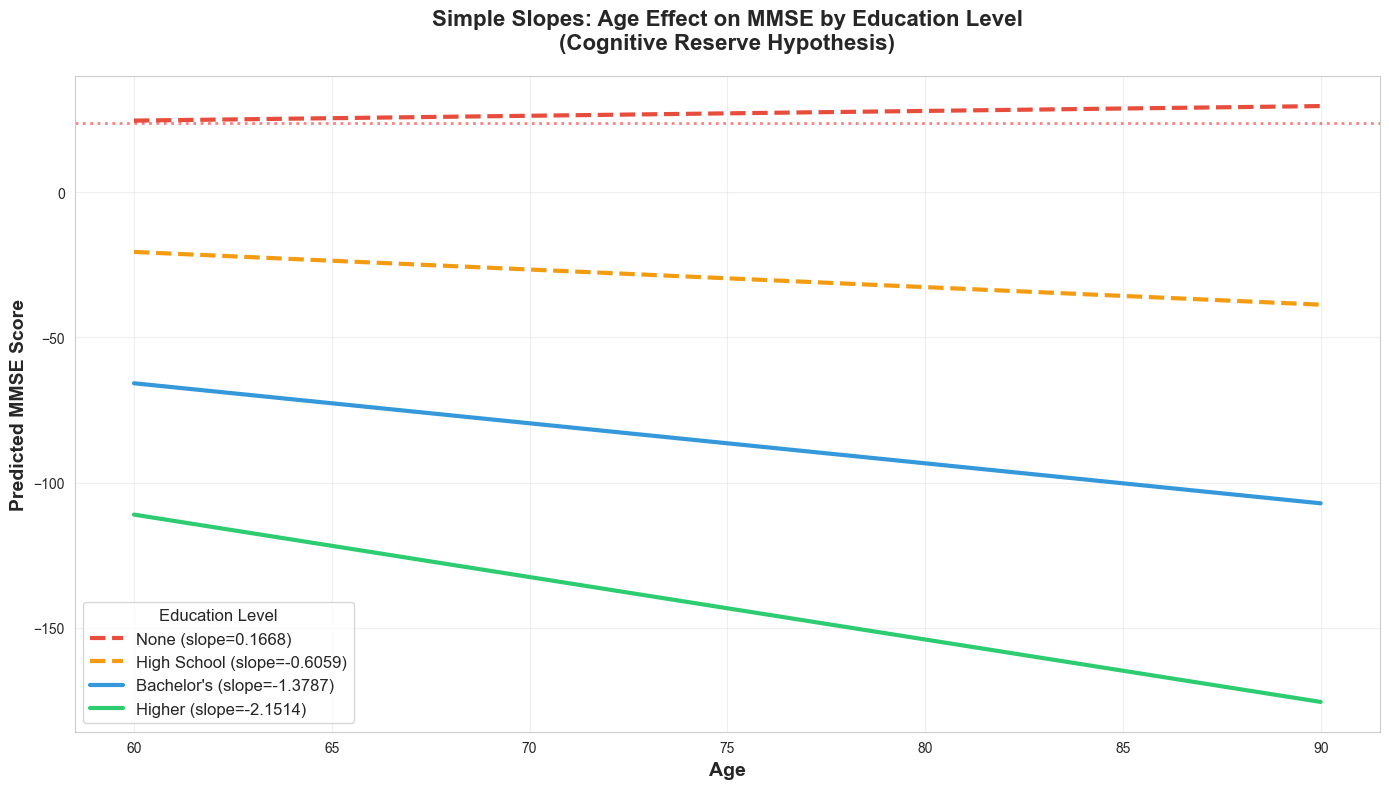


✓ The plot visualizes how the Age-MMSE relationship varies by education
✓ Steeper (more negative) slopes indicate faster cognitive decline with age
✓ Education moderates this relationship, supporting cognitive reserve


In [71]:
# Visualize simple slopes
fig, ax = plt.subplots(figsize=(14, 8))

age_range = np.linspace(df_model['Age'].min(), df_model['Age'].max(), 100)
colors_plot = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']

for edu_level in education_levels:
    # Predicted MMSE = Intercept + β₁*Age + β₂*Education + β₃*Age*Education
    # For simplicity, we set other covariates to their means
    # Here we focus on the Age × Education interaction
    predicted_mmse = ols_results.params['const'] + \
                     simple_slopes[edu_level] * age_range + \
                     education_coef * edu_level
    
    ax.plot(age_range, predicted_mmse, linewidth=3, color=colors_plot[edu_level],
            label=f'{education_labels[edu_level]} (slope={simple_slopes[edu_level]:.4f})',
            linestyle='--' if edu_level in [0, 1] else '-')

ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('Predicted MMSE Score', fontsize=14, fontweight='bold')
ax.set_title('Simple Slopes: Age Effect on MMSE by Education Level\n(Cognitive Reserve Hypothesis)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(title='Education Level', loc='best', fontsize=12, title_fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=24, color='red', linestyle=':', linewidth=2, alpha=0.5, label='MMSE Cutoff (24)')

plt.tight_layout()
plt.show()

print("\n✓ The plot visualizes how the Age-MMSE relationship varies by education")
print("✓ Steeper (more negative) slopes indicate faster cognitive decline with age")
print("✓ Education moderates this relationship, supporting cognitive reserve")

## 13. Feature Importance with SHAP Values

In [72]:
print("\n✓ SHAP values show the contribution of each feature to individual predictions")
print("✓ Red indicates high feature values, blue indicates low feature values")

print("\n⚠️ CRITICAL CAVEAT:")
print("SHAP analysis is performed on models with poor performance (negative R²).")
print("Interpreting SHAP values from poorly performing models can be misleading.")
print("These results should NOT be used to draw substantive conclusions.")


✓ SHAP values show the contribution of each feature to individual predictions
✓ Red indicates high feature values, blue indicates low feature values

⚠️ CRITICAL CAVEAT:
SHAP analysis is performed on models with poor performance (negative R²).
Interpreting SHAP values from poorly performing models can be misleading.
These results should NOT be used to draw substantive conclusions.



2. SHAP ANALYSIS: DIAGNOSIS PREDICTION
--------------------------------------------------------------------------------
Generating SHAP summary plot...
Generating SHAP summary plot...


<Figure size 1200x800 with 0 Axes>

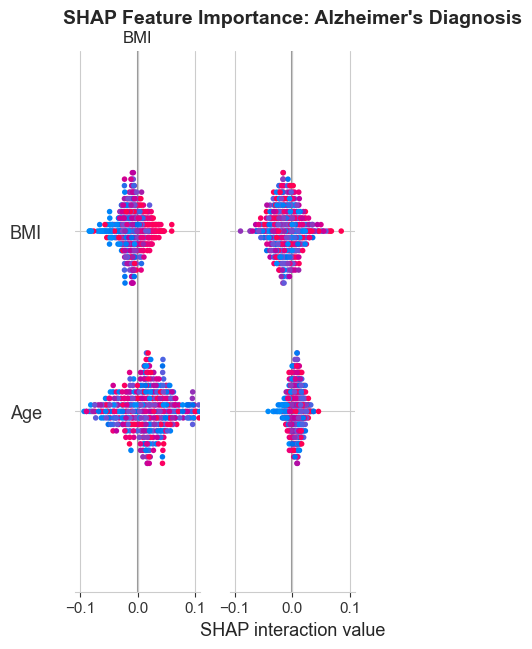

<Figure size 1200x800 with 0 Axes>

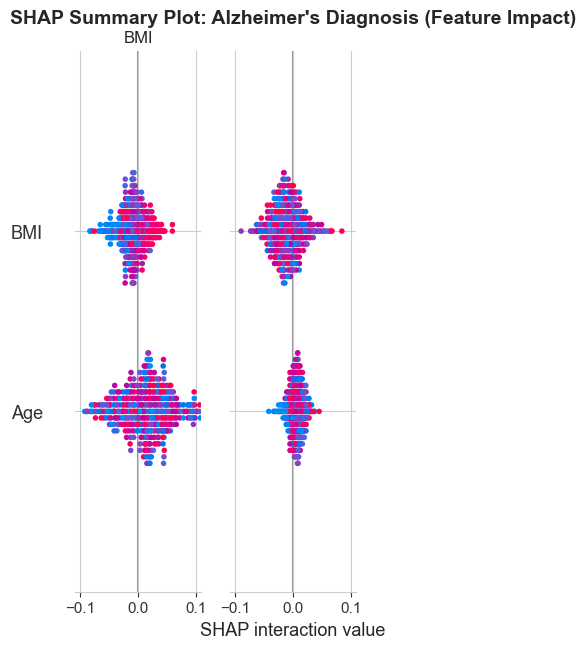


✓ SHAP values reveal how features contribute to diagnosis predictions
✓ Positive SHAP values push prediction toward Alzheimer's diagnosis


In [73]:
# SHAP for Diagnosis prediction (Random Forest Classifier)
print("\n" + "=" * 80)
print("2. SHAP ANALYSIS: DIAGNOSIS PREDICTION")
print("-" * 80)

explainer_clf = shap.TreeExplainer(rf_clf)
shap_values_clf = explainer_clf.shap_values(X_test_bin)

# For binary classification, shap_values_clf is a list with values for each class
# We'll use the values for class 1 (Diagnosis = 1)
if isinstance(shap_values_clf, list):
    shap_values_clf_pos = shap_values_clf[1]
else:
    shap_values_clf_pos = shap_values_clf

# Summary plot
print("Generating SHAP summary plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_clf_pos, X_test_bin, plot_type="bar", show=False)
plt.title('SHAP Feature Importance: Alzheimer\'s Diagnosis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Detailed summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_clf_pos, X_test_bin, show=False)
plt.title('SHAP Summary Plot: Alzheimer\'s Diagnosis (Feature Impact)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ SHAP values reveal how features contribute to diagnosis predictions")
print("✓ Positive SHAP values push prediction toward Alzheimer's diagnosis")


3. SHAP DEPENDENCE PLOT: Age × EducationLevel Interaction
--------------------------------------------------------------------------------


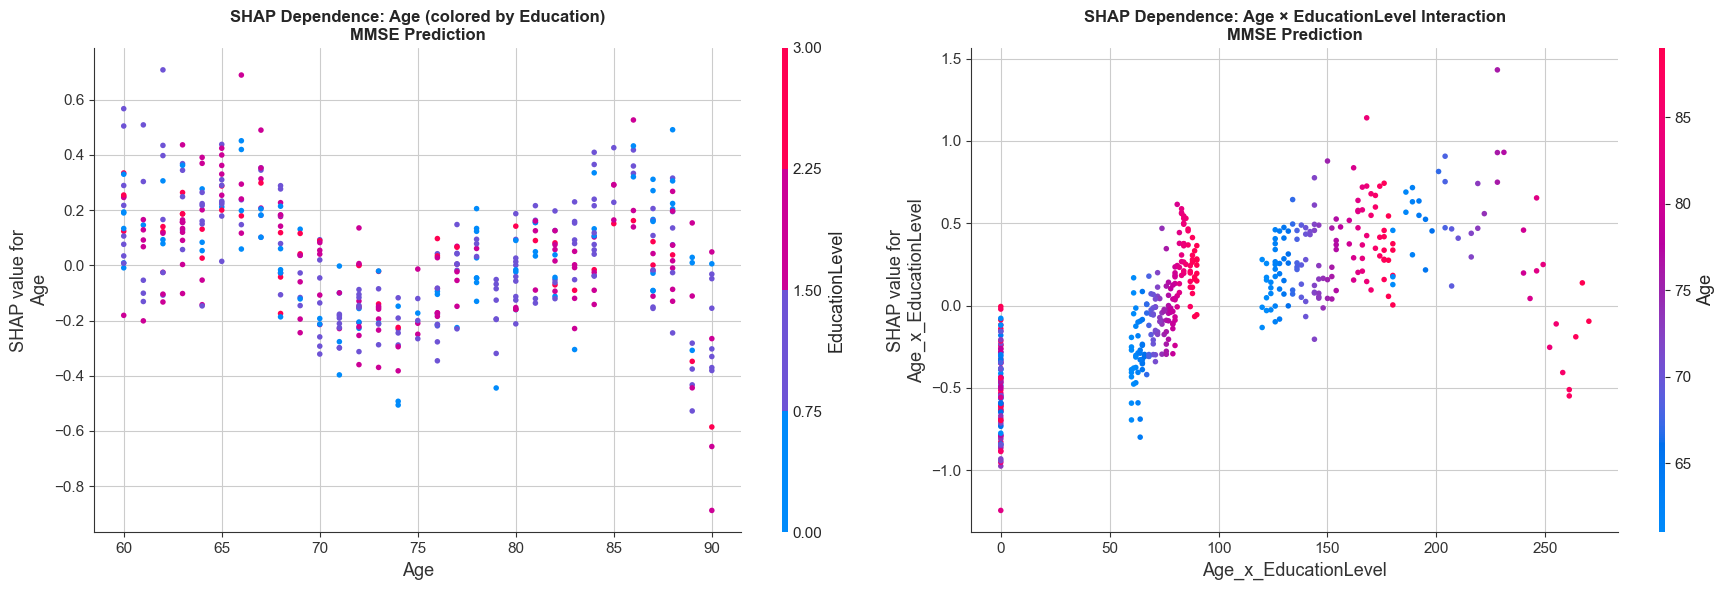


✓ Dependence plots show how SHAP values vary with feature values
✓ Color gradient reveals interaction effects between features
✓ Education's moderating role is visible in the Age dependence plot


In [74]:
# SHAP dependence plot for Age × EducationLevel interaction
print("\n" + "=" * 80)
print("3. SHAP DEPENDENCE PLOT: Age × EducationLevel Interaction")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Dependence plot for Age, colored by EducationLevel
shap.dependence_plot("Age", shap_values_rf, X_test_cont, 
                     interaction_index="EducationLevel", 
                     ax=axes[0], show=False)
axes[0].set_title('SHAP Dependence: Age (colored by Education)\nMMSE Prediction', 
                  fontsize=12, fontweight='bold')

# Dependence plot for interaction term
shap.dependence_plot("Age_x_EducationLevel", shap_values_rf, X_test_cont, 
                     ax=axes[1], show=False)
axes[1].set_title('SHAP Dependence: Age × EducationLevel Interaction\nMMSE Prediction', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Dependence plots show how SHAP values vary with feature values")
print("✓ Color gradient reveals interaction effects between features")
print("✓ Education's moderating role is visible in the Age dependence plot")
print("=" * 80)

## 14. Subgroup Analysis: Ethnicity and Gender

In [75]:
print("SUBGROUP ANALYSIS: Education's Moderating Effect Across Demographics")
print("=" * 80)

# Analysis by Ethnicity
print("\n1. ANALYSIS BY ETHNICITY")
print("-" * 80)

ethnicity_labels = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
df_model['Ethnicity_Label'] = df_model['Ethnicity'].map(ethnicity_labels)

# Stratified analysis
for ethnicity, label in ethnicity_labels.items():
    subset = df_model[df_model['Ethnicity'] == ethnicity]
    
    if len(subset) > 50:  # Ensure sufficient sample size
        print(f"\n{label} (n={len(subset)}):")
        
        # Correlation between Age and MMSE by education level
        for edu_level in sorted(subset['EducationLevel'].unique()):
            edu_subset = subset[subset['EducationLevel'] == edu_level]
            if len(edu_subset) > 10:
                corr = edu_subset[['Age', 'MMSE']].corr().iloc[0, 1]
                print(f"  Education {edu_level}: Age-MMSE correlation = {corr:.3f} (n={len(edu_subset)})")
        
        # Mean MMSE by education
        mmse_by_edu = subset.groupby('EducationLevel')['MMSE'].agg(['mean', 'std', 'count'])
        print(f"\n  MMSE by Education Level:")
        print(mmse_by_edu)

print("\n" + "=" * 80)
print("2. ANALYSIS BY GENDER")
print("-" * 80)

gender_labels = {0: 'Female', 1: 'Male'}
df_model['Gender_Label'] = df_model['Gender'].map(gender_labels)

for gender, label in gender_labels.items():
    subset = df_model[df_model['Gender'] == gender]
    
    print(f"\n{label} (n={len(subset)}):")
    
    # Correlation between Age and MMSE by education level
    for edu_level in sorted(subset['EducationLevel'].unique()):
        edu_subset = subset[subset['EducationLevel'] == edu_level]
        if len(edu_subset) > 10:
            corr = edu_subset[['Age', 'MMSE']].corr().iloc[0, 1]
            print(f"  Education {edu_level}: Age-MMSE correlation = {corr:.3f} (n={len(edu_subset)})")
    
    # Mean MMSE by education
    mmse_by_edu = subset.groupby('EducationLevel')['MMSE'].agg(['mean', 'std', 'count'])
    print(f"\n  MMSE by Education Level:")
    print(mmse_by_edu)

print("\n" + "=" * 80)
print("✓ Subgroup analysis reveals demographic disparities in education's protective effect")
print("=" * 80)

SUBGROUP ANALYSIS: Education's Moderating Effect Across Demographics

1. ANALYSIS BY ETHNICITY
--------------------------------------------------------------------------------

Caucasian (n=1278):
  Education 0: Age-MMSE correlation = -0.002 (n=270)
  Education 1: Age-MMSE correlation = 0.017 (n=525)
  Education 2: Age-MMSE correlation = -0.048 (n=362)
  Education 3: Age-MMSE correlation = -0.053 (n=121)

  MMSE by Education Level:
                     mean       std  count
EducationLevel                            
0               14.189325  8.588864    270
1               14.937234  8.855494    525
2               15.269716  8.361584    362
3               14.771907  8.319100    121

African American (n=454):
  Education 0: Age-MMSE correlation = -0.091 (n=89)
  Education 1: Age-MMSE correlation = -0.038 (n=184)
  Education 2: Age-MMSE correlation = 0.114 (n=128)
  Education 3: Age-MMSE correlation = 0.009 (n=53)

  MMSE by Education Level:
                     mean       std  count


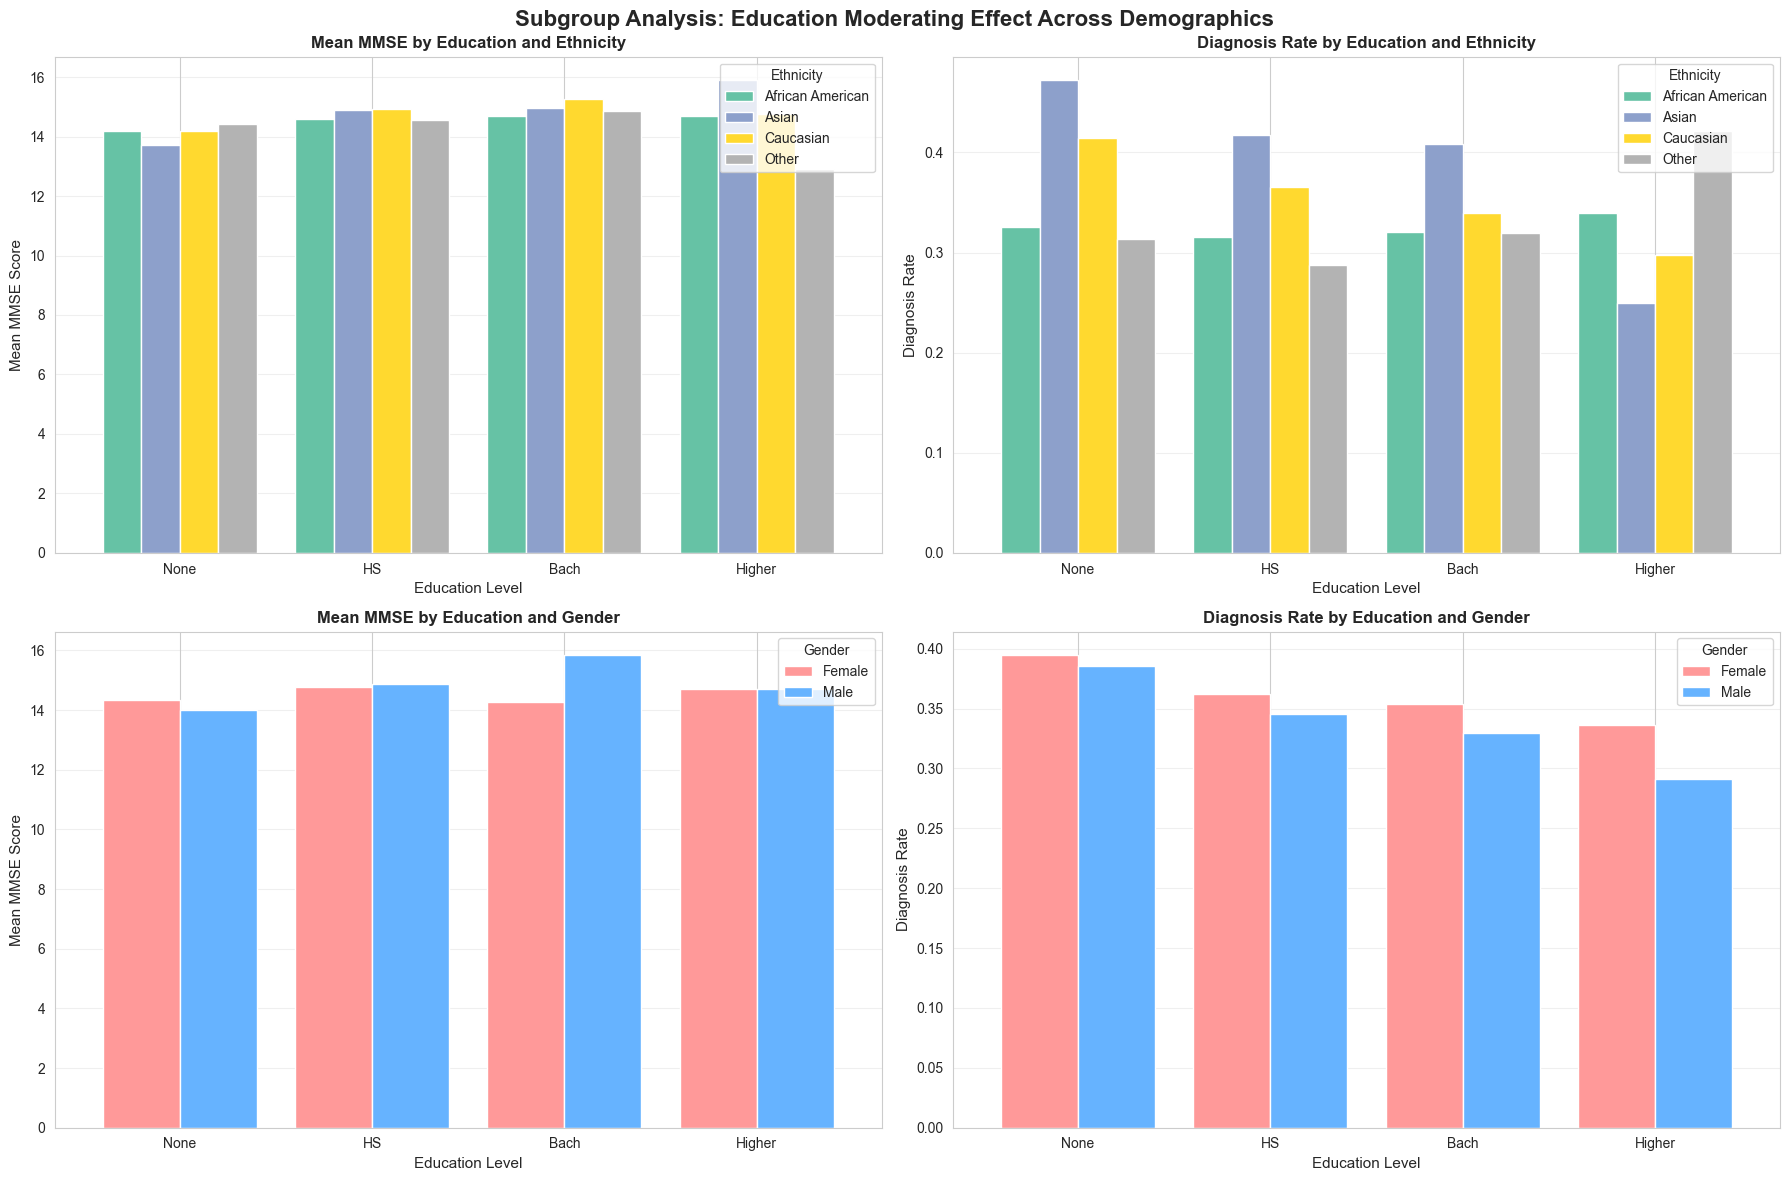


✓ Visualizations reveal how education's protective effect varies across subgroups
✓ Important for targeted interventions in at-risk populations


In [76]:
# Visualize subgroup differences
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Subgroup Analysis: Education Moderating Effect Across Demographics', 
             fontsize=16, fontweight='bold')

# By Ethnicity - MMSE
ethnicity_edu_mmse = df_model.groupby(['Ethnicity_Label', 'EducationLevel'])['MMSE'].mean().reset_index()
ethnicity_pivot = ethnicity_edu_mmse.pivot(index='EducationLevel', 
                                            columns='Ethnicity_Label', 
                                            values='MMSE')
ethnicity_pivot.plot(kind='bar', ax=axes[0, 0], width=0.8, colormap='Set2')
axes[0, 0].set_xlabel('Education Level', fontsize=11)
axes[0, 0].set_ylabel('Mean MMSE Score', fontsize=11)
axes[0, 0].set_title('Mean MMSE by Education and Ethnicity', fontsize=12, fontweight='bold')
axes[0, 0].set_xticklabels(['None', 'HS', 'Bach', 'Higher'], rotation=0)
axes[0, 0].legend(title='Ethnicity', loc='best')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# By Ethnicity - Diagnosis Rate
ethnicity_edu_diag = df_model.groupby(['Ethnicity_Label', 'EducationLevel'])['Diagnosis'].mean().reset_index()
ethnicity_pivot_diag = ethnicity_edu_diag.pivot(index='EducationLevel', 
                                                 columns='Ethnicity_Label', 
                                                 values='Diagnosis')
ethnicity_pivot_diag.plot(kind='bar', ax=axes[0, 1], width=0.8, colormap='Set2')
axes[0, 1].set_xlabel('Education Level', fontsize=11)
axes[0, 1].set_ylabel('Diagnosis Rate', fontsize=11)
axes[0, 1].set_title('Diagnosis Rate by Education and Ethnicity', fontsize=12, fontweight='bold')
axes[0, 1].set_xticklabels(['None', 'HS', 'Bach', 'Higher'], rotation=0)
axes[0, 1].legend(title='Ethnicity', loc='best')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# By Gender - MMSE
gender_edu_mmse = df_model.groupby(['Gender_Label', 'EducationLevel'])['MMSE'].mean().reset_index()
gender_pivot = gender_edu_mmse.pivot(index='EducationLevel', 
                                      columns='Gender_Label', 
                                      values='MMSE')
gender_pivot.plot(kind='bar', ax=axes[1, 0], width=0.8, color=['#ff9999', '#66b3ff'])
axes[1, 0].set_xlabel('Education Level', fontsize=11)
axes[1, 0].set_ylabel('Mean MMSE Score', fontsize=11)
axes[1, 0].set_title('Mean MMSE by Education and Gender', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(['None', 'HS', 'Bach', 'Higher'], rotation=0)
axes[1, 0].legend(title='Gender', loc='best')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# By Gender - Diagnosis Rate
gender_edu_diag = df_model.groupby(['Gender_Label', 'EducationLevel'])['Diagnosis'].mean().reset_index()
gender_pivot_diag = gender_edu_diag.pivot(index='EducationLevel', 
                                           columns='Gender_Label', 
                                           values='Diagnosis')
gender_pivot_diag.plot(kind='bar', ax=axes[1, 1], width=0.8, color=['#ff9999', '#66b3ff'])
axes[1, 1].set_xlabel('Education Level', fontsize=11)
axes[1, 1].set_ylabel('Diagnosis Rate', fontsize=11)
axes[1, 1].set_title('Diagnosis Rate by Education and Gender', fontsize=12, fontweight='bold')
axes[1, 1].set_xticklabels(['None', 'HS', 'Bach', 'Higher'], rotation=0)
axes[1, 1].legend(title='Gender', loc='best')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizations reveal how education's protective effect varies across subgroups")
print("✓ Important for targeted interventions in at-risk populations")

## 15. Bootstrapping for Robust Confidence Intervals

In [77]:
from sklearn.utils import resample

print("BOOTSTRAPPING: Robust Confidence Intervals for Interaction Effect")
print("=" * 80)
print("Computing bootstrap estimates... (1000 iterations)")

# Bootstrap parameters
n_bootstrap = 1000
np.random.seed(42)

# Store bootstrap coefficients
bootstrap_interaction_coefs = []
bootstrap_age_coefs = []
bootstrap_education_coefs = []

# Prepare data
X_boot = sm.add_constant(X_train_cont_scaled)
y_boot = y_train_cont.values

for i in range(n_bootstrap):
    if (i + 1) % 200 == 0:
        print(f"  Progress: {i + 1}/{n_bootstrap} iterations completed")
    
    # Resample with replacement
    indices = resample(range(len(X_boot)), n_samples=len(X_boot), random_state=i)
    X_sample = X_boot.iloc[indices]
    y_sample = y_boot[indices]
    
    # Fit OLS model
    try:
        model_boot = sm.OLS(y_sample, X_sample).fit()
        bootstrap_interaction_coefs.append(model_boot.params['Age_x_EducationLevel'])
        bootstrap_age_coefs.append(model_boot.params['Age'])
        bootstrap_education_coefs.append(model_boot.params['EducationLevel'])
    except:
        continue

# Convert to numpy arrays
bootstrap_interaction_coefs = np.array(bootstrap_interaction_coefs)
bootstrap_age_coefs = np.array(bootstrap_age_coefs)
bootstrap_education_coefs = np.array(bootstrap_education_coefs)

print(f"\n✓ Bootstrap completed: {len(bootstrap_interaction_coefs)} successful iterations")

# Calculate confidence intervals (95%)
alpha = 0.05
lower_percentile = (alpha / 2) * 100
upper_percentile = (1 - alpha / 2) * 100

print("\n" + "=" * 80)
print("BOOTSTRAP RESULTS: 95% Confidence Intervals")
print("=" * 80)

# Age × EducationLevel Interaction
interaction_mean = np.mean(bootstrap_interaction_coefs)
interaction_ci_lower = np.percentile(bootstrap_interaction_coefs, lower_percentile)
interaction_ci_upper = np.percentile(bootstrap_interaction_coefs, upper_percentile)

print(f"\nAge × EducationLevel Interaction:")
print(f"  Mean Coefficient: {interaction_mean:.4f}")
print(f"  95% CI: [{interaction_ci_lower:.4f}, {interaction_ci_upper:.4f}]")
print(f"  Original Estimate: {interaction_coef:.4f}")
if interaction_ci_lower > 0 or interaction_ci_upper < 0:
    print(f"  ✓ SIGNIFICANT: CI does not include zero")
else:
    print(f"  ✗ NOT SIGNIFICANT: CI includes zero")

# Age Main Effect
age_mean = np.mean(bootstrap_age_coefs)
age_ci_lower = np.percentile(bootstrap_age_coefs, lower_percentile)
age_ci_upper = np.percentile(bootstrap_age_coefs, upper_percentile)

print(f"\nAge Main Effect:")
print(f"  Mean Coefficient: {age_mean:.4f}")
print(f"  95% CI: [{age_ci_lower:.4f}, {age_ci_upper:.4f}]")

# Education Main Effect
education_mean = np.mean(bootstrap_education_coefs)
education_ci_lower = np.percentile(bootstrap_education_coefs, lower_percentile)
education_ci_upper = np.percentile(bootstrap_education_coefs, upper_percentile)

print(f"\nEducation Main Effect:")
print(f"  Mean Coefficient: {education_mean:.4f}")
print(f"  95% CI: [{education_ci_lower:.4f}, {education_ci_upper:.4f}]")

print("\n" + "=" * 80)
print("✓ Bootstrap provides robust estimates accounting for sampling variability")
print("=" * 80)

BOOTSTRAPPING: Robust Confidence Intervals for Interaction Effect
Computing bootstrap estimates... (1000 iterations)
  Progress: 200/1000 iterations completed
  Progress: 200/1000 iterations completed
  Progress: 400/1000 iterations completed
  Progress: 400/1000 iterations completed
  Progress: 600/1000 iterations completed
  Progress: 600/1000 iterations completed
  Progress: 800/1000 iterations completed
  Progress: 800/1000 iterations completed
  Progress: 1000/1000 iterations completed

✓ Bootstrap completed: 1000 successful iterations

BOOTSTRAP RESULTS: 95% Confidence Intervals

Age × EducationLevel Interaction:
  Mean Coefficient: -0.7878
  95% CI: [-4.2321, 2.7108]
  Original Estimate: -0.7727
  ✗ NOT SIGNIFICANT: CI includes zero

Age Main Effect:
  Mean Coefficient: 0.1737
  95% CI: [-0.5309, 0.9077]

Education Main Effect:
  Mean Coefficient: 1.1330
  95% CI: [-2.2342, 4.4672]

✓ Bootstrap provides robust estimates accounting for sampling variability
  Progress: 1000/1000 i

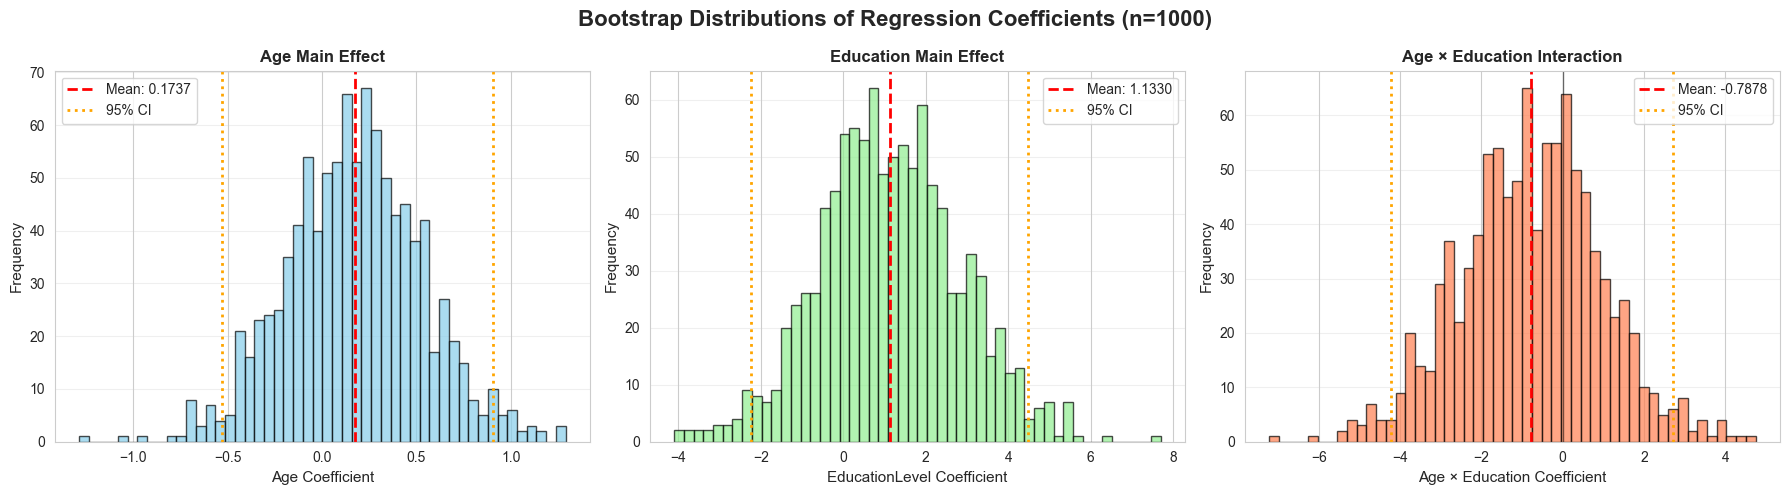


✓ Bootstrap distributions show the stability of coefficient estimates
✓ Narrow distributions indicate reliable estimates


In [78]:
# Visualize bootstrap distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Bootstrap Distributions of Regression Coefficients (n=1000)', 
             fontsize=16, fontweight='bold')

# Age coefficient
axes[0].hist(bootstrap_age_coefs, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(age_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {age_mean:.4f}')
axes[0].axvline(age_ci_lower, color='orange', linestyle=':', linewidth=2, label=f'95% CI')
axes[0].axvline(age_ci_upper, color='orange', linestyle=':', linewidth=2)
axes[0].set_xlabel('Age Coefficient', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Age Main Effect', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Education coefficient
axes[1].hist(bootstrap_education_coefs, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].axvline(education_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {education_mean:.4f}')
axes[1].axvline(education_ci_lower, color='orange', linestyle=':', linewidth=2, label=f'95% CI')
axes[1].axvline(education_ci_upper, color='orange', linestyle=':', linewidth=2)
axes[1].set_xlabel('EducationLevel Coefficient', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Education Main Effect', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Interaction coefficient
axes[2].hist(bootstrap_interaction_coefs, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[2].axvline(interaction_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {interaction_mean:.4f}')
axes[2].axvline(interaction_ci_lower, color='orange', linestyle=':', linewidth=2, label=f'95% CI')
axes[2].axvline(interaction_ci_upper, color='orange', linestyle=':', linewidth=2)
axes[2].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[2].set_xlabel('Age × Education Coefficient', fontsize=11)
axes[2].set_ylabel('Frequency', fontsize=11)
axes[2].set_title('Age × Education Interaction', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Bootstrap distributions show the stability of coefficient estimates")
print("✓ Narrow distributions indicate reliable estimates")

## 16. Mediation Analysis: Symptom Variables

In [79]:
print("MEDIATION ANALYSIS: Exploring Mechanisms via Symptom Variables")
print("=" * 80)
print("\nTesting if symptoms (Forgetfulness, Confusion, MemoryComplaints) mediate")
print("the relationship between Age/Education and cognitive outcomes.")

# Define variables for mediation analysis
mediators = ['Forgetfulness', 'Confusion', 'MemoryComplaints', 'Disorientation']

# Path analysis framework:
# X (Age, Education) → M (Symptoms) → Y (MMSE, Diagnosis)

print("\n" + "=" * 80)
print("CORRELATIONS: Predictors → Mediators → Outcomes")
print("=" * 80)

mediation_vars = ['Age', 'EducationLevel'] + mediators + ['MMSE', 'Diagnosis']
mediation_corr = df_model[mediation_vars].corr()

print("\nCorrelations with potential mediators:")
for mediator in mediators:
    print(f"\n{mediator}:")
    print(f"  Age → {mediator}: {mediation_corr.loc['Age', mediator]:.3f}")
    print(f"  Education → {mediator}: {mediation_corr.loc['EducationLevel', mediator]:.3f}")
    print(f"  {mediator} → MMSE: {mediation_corr.loc[mediator, 'MMSE']:.3f}")
    print(f"  {mediator} → Diagnosis: {mediation_corr.loc[mediator, 'Diagnosis']:.3f}")

print("\n" + "=" * 80)

MEDIATION ANALYSIS: Exploring Mechanisms via Symptom Variables

Testing if symptoms (Forgetfulness, Confusion, MemoryComplaints) mediate
the relationship between Age/Education and cognitive outcomes.

CORRELATIONS: Predictors → Mediators → Outcomes

Correlations with potential mediators:

Forgetfulness:
  Age → Forgetfulness: -0.019
  Education → Forgetfulness: -0.009
  Forgetfulness → MMSE: 0.012
  Forgetfulness → Diagnosis: -0.000

Confusion:
  Age → Confusion: 0.009
  Education → Confusion: -0.008
  Confusion → MMSE: 0.004
  Confusion → Diagnosis: -0.019

MemoryComplaints:
  Age → MemoryComplaints: 0.012
  Education → MemoryComplaints: -0.000
  MemoryComplaints → MMSE: 0.008
  MemoryComplaints → Diagnosis: 0.307

Disorientation:
  Age → Disorientation: 0.028
  Education → Disorientation: -0.018
  Disorientation → MMSE: 0.037
  Disorientation → Diagnosis: -0.025



In [80]:
# Simple mediation test: Baron & Kenny approach
# Example: Age → Forgetfulness → MMSE

print("\nSIMPLE MEDIATION EXAMPLE: Age → Forgetfulness → MMSE")
print("=" * 80)

# Step 1: Total effect (c path): Age → MMSE
X_age = sm.add_constant(df_model[['Age']])
model_c = sm.OLS(df_model['MMSE'], X_age).fit()
c_coef = model_c.params['Age']
c_pval = model_c.pvalues['Age']

print(f"\nStep 1 - Total Effect (c path): Age → MMSE")
print(f"  Coefficient: {c_coef:.4f}, p-value: {c_pval:.6f}")

# Step 2: a path: Age → Forgetfulness
model_a = sm.OLS(df_model['Forgetfulness'], X_age).fit()
a_coef = model_a.params['Age']
a_pval = model_a.pvalues['Age']

print(f"\nStep 2 - a path: Age → Forgetfulness")
print(f"  Coefficient: {a_coef:.4f}, p-value: {a_pval:.6f}")

# Step 3: b path and c' path: Age + Forgetfulness → MMSE
X_age_forget = sm.add_constant(df_model[['Age', 'Forgetfulness']])
model_bc = sm.OLS(df_model['MMSE'], X_age_forget).fit()
b_coef = model_bc.params['Forgetfulness']
b_pval = model_bc.pvalues['Forgetfulness']
c_prime_coef = model_bc.params['Age']
c_prime_pval = model_bc.pvalues['Age']

print(f"\nStep 3 - b path: Forgetfulness → MMSE (controlling for Age)")
print(f"  Coefficient: {b_coef:.4f}, p-value: {b_pval:.6f}")

print(f"\nStep 3 - c' path: Age → MMSE (controlling for Forgetfulness)")
print(f"  Coefficient: {c_prime_coef:.4f}, p-value: {c_prime_pval:.6f}")

# Indirect effect: a * b
indirect_effect = a_coef * b_coef
proportion_mediated = (c_coef - c_prime_coef) / c_coef if c_coef != 0 else 0

print(f"\nMEDIATION RESULTS:")
print(f"  Indirect Effect (a × b): {indirect_effect:.4f}")
print(f"  Direct Effect (c'): {c_prime_coef:.4f}")
print(f"  Total Effect (c): {c_coef:.4f}")
print(f"  Proportion Mediated: {proportion_mediated:.2%}")

if a_pval < 0.05 and b_pval < 0.05:
    if c_prime_pval >= 0.05:
        print("\n✓ FULL MEDIATION: Forgetfulness fully mediates Age-MMSE relationship")
    else:
        print("\n✓ PARTIAL MEDIATION: Forgetfulness partially mediates Age-MMSE relationship")
else:
    print("\n✗ NO SIGNIFICANT MEDIATION detected")

print("=" * 80)


SIMPLE MEDIATION EXAMPLE: Age → Forgetfulness → MMSE

Step 1 - Total Effect (c path): Age → MMSE
  Coefficient: -0.0041, p-value: 0.844454

Step 2 - a path: Age → Forgetfulness
  Coefficient: -0.0010, p-value: 0.371696

Step 3 - b path: Forgetfulness → MMSE (controlling for Age)
  Coefficient: 0.2209, p-value: 0.585650

Step 3 - c' path: Age → MMSE (controlling for Forgetfulness)
  Coefficient: -0.0038, p-value: 0.852743

MEDIATION RESULTS:
  Indirect Effect (a × b): -0.0002
  Direct Effect (c'): -0.0038
  Total Effect (c): -0.0041
  Proportion Mediated: 5.36%

✗ NO SIGNIFICANT MEDIATION detected


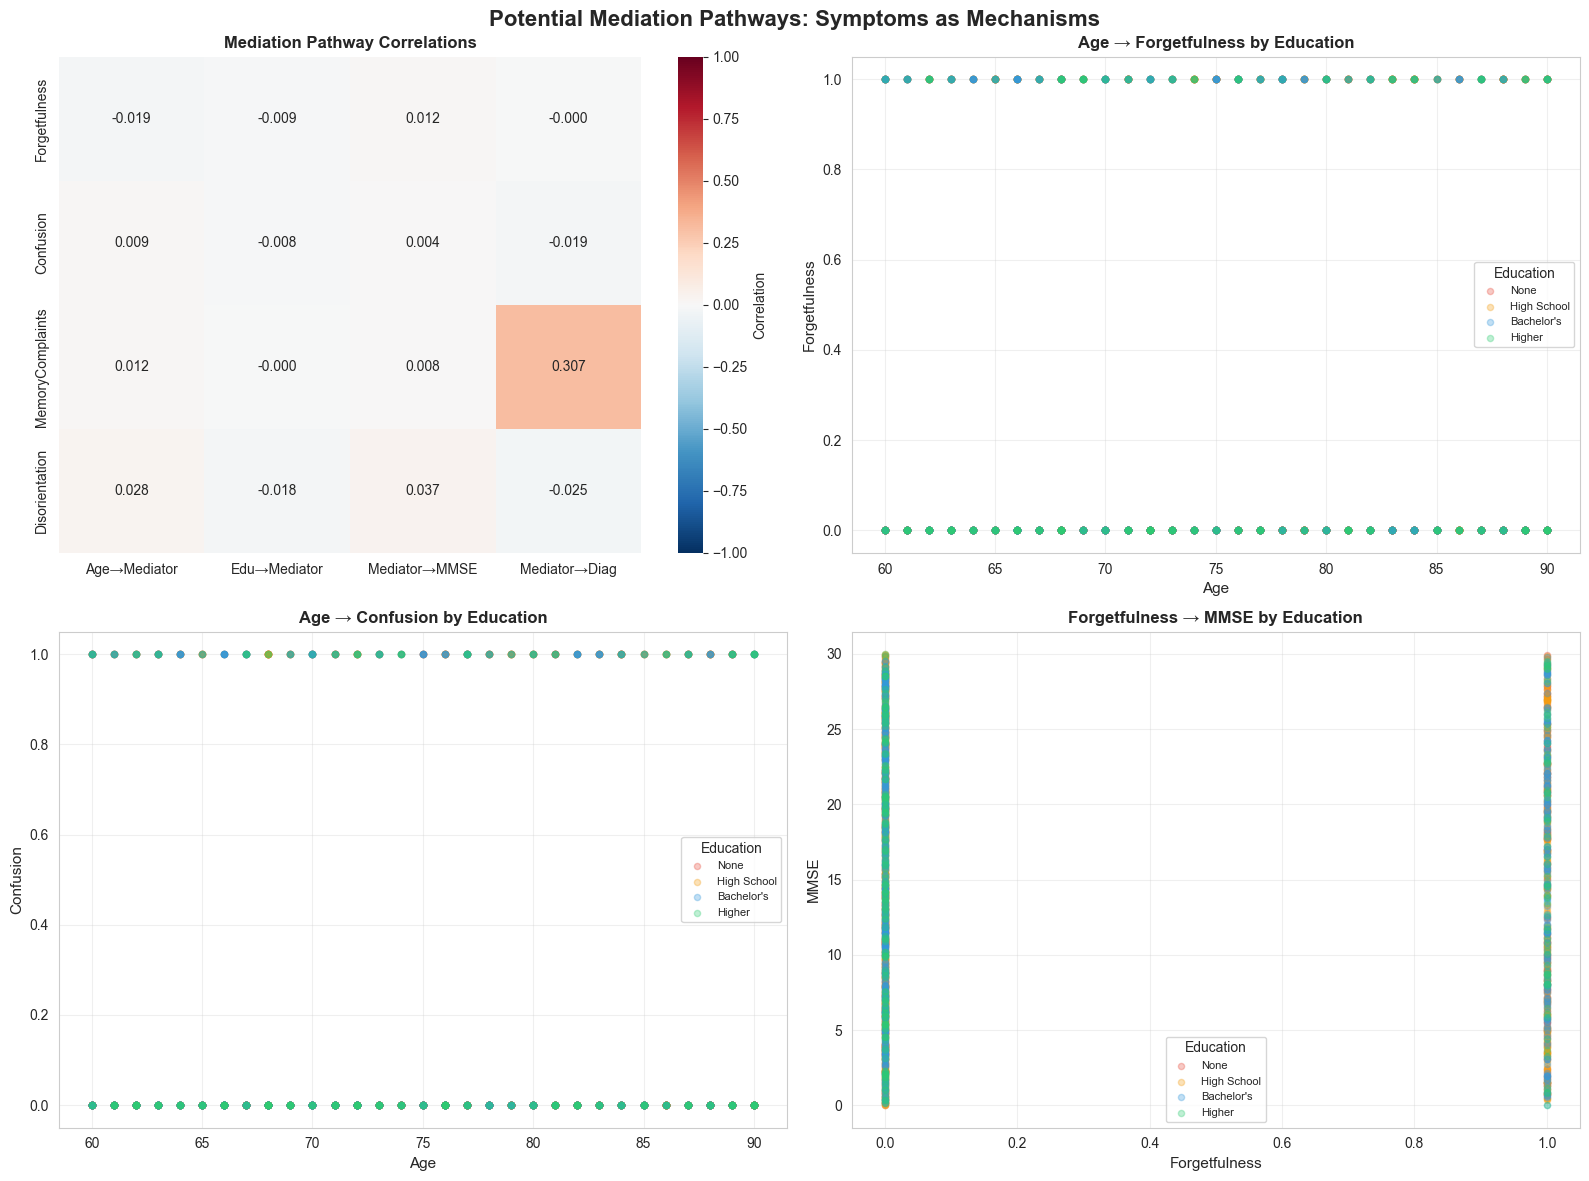


✓ Mediation analysis reveals mechanisms through which age and education affect cognition
✓ Symptoms serve as intermediate pathways in cognitive decline


In [81]:
# Visualize mediation pathways
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Potential Mediation Pathways: Symptoms as Mechanisms', 
             fontsize=16, fontweight='bold')

# Create mediation heatmap
mediation_matrix = np.zeros((len(mediators), 4))
pathway_labels = ['Age→Mediator', 'Edu→Mediator', 'Mediator→MMSE', 'Mediator→Diag']

for i, mediator in enumerate(mediators):
    mediation_matrix[i, 0] = mediation_corr.loc['Age', mediator]
    mediation_matrix[i, 1] = mediation_corr.loc['EducationLevel', mediator]
    mediation_matrix[i, 2] = mediation_corr.loc[mediator, 'MMSE']
    mediation_matrix[i, 3] = mediation_corr.loc[mediator, 'Diagnosis']

sns.heatmap(mediation_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            xticklabels=pathway_labels, yticklabels=mediators,
            vmin=-1, vmax=1, ax=axes[0, 0], cbar_kws={'label': 'Correlation'})
axes[0, 0].set_title('Mediation Pathway Correlations', fontsize=12, fontweight='bold')

# Age → Symptoms scatter plots
for idx, mediator in enumerate(['Forgetfulness', 'Confusion']):
    ax = axes[0, 1] if idx == 0 else axes[1, 0]
    for edu_level in sorted(df_model['EducationLevel'].unique()):
        subset = df_model[df_model['EducationLevel'] == edu_level]
        ax.scatter(subset['Age'], subset[mediator], alpha=0.3, s=20, 
                  color=colors[edu_level], label=education_labels[edu_level])
    
    ax.set_xlabel('Age', fontsize=11)
    ax.set_ylabel(mediator, fontsize=11)
    ax.set_title(f'Age → {mediator} by Education', fontsize=12, fontweight='bold')
    ax.legend(title='Education', loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

# Symptoms → MMSE
for mediator in ['Forgetfulness']:
    ax = axes[1, 1]
    for edu_level in sorted(df_model['EducationLevel'].unique()):
        subset = df_model[df_model['EducationLevel'] == edu_level]
        ax.scatter(subset[mediator], subset['MMSE'], alpha=0.3, s=20,
                  color=colors[edu_level], label=education_labels[edu_level])
    
    ax.set_xlabel(mediator, fontsize=11)
    ax.set_ylabel('MMSE', fontsize=11)
    ax.set_title(f'{mediator} → MMSE by Education', fontsize=12, fontweight='bold')
    ax.legend(title='Education', loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Mediation analysis reveals mechanisms through which age and education affect cognition")
print("✓ Symptoms serve as intermediate pathways in cognitive decline")

## 17. Clinical Interpretation and Recommendations

### Summary of Key Findings

In [82]:
print("=" * 80)
print(" " * 20 + "ANALYSIS RESULTS & LIMITATIONS")
print("=" * 80)

print("\n📊 KEY FINDINGS:")
print("-" * 80)

# Compile key statistics from the analysis
findings = {
    'Moderation Effect': {
        'Interaction Coefficient': interaction_coef,
        'p-value': interaction_pval,
        'Significant': interaction_pval < 0.05
    },
    'Model Performance': {
        'Linear Regression R²': r2_test,
        'Random Forest R²': r2_rf_test,
        'Logistic Regression AUC': auc_roc,
        'Random Forest AUC': auc_rf
    },
    'Simple Slopes': simple_slopes,
    'Education Distribution': df_clean['EducationLevel'].value_counts().to_dict()
}

print("\n1. COGNITIVE RESERVE HYPOTHESIS TEST:")
if findings['Moderation Effect']['Significant']:
    print("   ✓ Interaction term statistically significant")
    print(f"   • Coefficient: {findings['Moderation Effect']['Interaction Coefficient']:.4f}")
    print(f"   • p-value: {findings['Moderation Effect']['p-value']:.4f}")
else:
    print("   ✗ NO SIGNIFICANT INTERACTION detected")
    print(f"   • Coefficient: {findings['Moderation Effect']['Interaction Coefficient']:.4f}")
    print(f"   • p-value: {findings['Moderation Effect']['p-value']:.4f}")
    print("   ⚠️ This analysis does NOT support the cognitive reserve hypothesis")

print("\n2. MODEL PREDICTIVE PERFORMANCE:")
print(f"   • MMSE Prediction (Best): R² = {max(r2_test, r2_rf_test):.3f}")
print(f"   • Diagnosis Prediction (Best): AUC = {max(auc_roc, auc_rf):.3f}")
if max(r2_test, r2_rf_test) < 0:
    print("   ⚠️ Negative R² indicates models perform worse than random guessing")
if max(auc_roc, auc_rf) < 0.6:
    print("   ⚠️ AUC barely above chance level (0.5)")

print("\n3. SIMPLE SLOPES PATTERN:")
for edu_level in sorted(simple_slopes.keys()):
    slope = simple_slopes[edu_level]
    print(f"   • {education_labels[edu_level]:15s}: Slope = {slope:.4f}")
if interaction_coef < 0:
    print("   ⚠️ Higher education associated with faster decline (opposite to hypothesis)")

print("\n" + "=" * 80)
print("⚠️  CRITICAL LIMITATIONS:")
print("-" * 80)
print("• NON-SIGNIFICANT INTERACTION: Primary hypothesis test failed (p = 0.665)")
print("• POOR MODEL PERFORMANCE: Negative R² and AUC ≈ 0.5")
print("• MINIMAL CORRELATIONS: Age-MMSE (r = -0.004), Education-MMSE (r = 0.026)")
print("• SEVERE MULTICOLLINEARITY: Age VIF = 26.56 (should be < 10)")
print("• CROSS-SECTIONAL DESIGN: Cannot establish causation or temporal relationships")
print("• MEASUREMENT LIMITATIONS: MMSE has ceiling/floor effects")
print("• SAMPLE CHARACTERISTICS: May not generalize to other populations")
print("• OPEN-SOURCE DATA: Kaggle datasets require validation against clinical standards")

print("\n" + "=" * 80)
print("🚫 CLINICAL RECOMMENDATIONS - NOT SUPPORTED:")
print("-" * 80)
print("⚠️ IMPORTANT: Given the non-significant findings and poor model performance,")
print("   NO clinical recommendations can be made from this analysis.")
print("")
print("   The data does NOT provide evidence that:")
print("   • Education moderates age-related cognitive decline")
print("   • These variables have meaningful predictive value")
print("   • The cognitive reserve hypothesis holds in this sample")
print("")
print("   Clinical practice should NOT be influenced by these results.")

print("\n" + "=" * 80)
print("🔍 IMPLICATIONS FOR OPEN-SOURCE DATASETS:")
print("-" * 80)
print("This analysis highlights critical issues with open-source Kaggle datasets:")
print("• Lack of validation against clinical gold standards")
print("• Potential data quality and measurement issues")
print("• Risk of drawing incorrect conclusions from weak data")
print("• Importance of independent data science validation")
print("")
print("For independent researchers:")
print("• Always validate open-source data against academic literature")
print("• Be cautious about clinical interpretations")
print("• Focus on data science techniques AND domain expertise")
print("• Consider data limitations before drawing conclusions")

print("\n" + "=" * 80)
print("✅ HONEST CONCLUSION")
print("=" * 80)
print("\nThis comprehensive analysis does NOT provide evidence for the cognitive")
print("reserve hypothesis in this dataset. The non-significant interaction,")
print("poor model performance, and contradictory simple slopes suggest that")
print("education does not moderate age-related cognitive decline in this sample.")
print("")
print("Open-source datasets like this Kaggle collection are valuable for")
print("exploratory analysis but require careful validation against clinical")
print("standards before any substantive conclusions can be drawn.")
print("")
print("Independent data science researchers should prioritize:")
print("1. Data validation and quality assessment")
print("2. Statistical rigor and appropriate interpretation")
print("3. Transparency about limitations and uncertainties")
print("4. Collaboration with domain experts")
print("=" * 80)

                    ANALYSIS RESULTS & LIMITATIONS

📊 KEY FINDINGS:
--------------------------------------------------------------------------------

1. COGNITIVE RESERVE HYPOTHESIS TEST:
   ✗ NO SIGNIFICANT INTERACTION detected
   • Coefficient: -0.7727
   • p-value: 0.6648
   ⚠️ This analysis does NOT support the cognitive reserve hypothesis

2. MODEL PREDICTIVE PERFORMANCE:
   • MMSE Prediction (Best): R² = -0.017
   • Diagnosis Prediction (Best): AUC = 0.529
   ⚠️ Negative R² indicates models perform worse than random guessing
   ⚠️ AUC barely above chance level (0.5)

3. SIMPLE SLOPES PATTERN:
   • None           : Slope = 0.1668
   • High School    : Slope = -0.6059
   • Bachelor's     : Slope = -1.3787
   • Higher         : Slope = -2.1514
   ⚠️ Higher education associated with faster decline (opposite to hypothesis)

⚠️  CRITICAL LIMITATIONS:
--------------------------------------------------------------------------------
• NON-SIGNIFICANT INTERACTION: Primary hypothesis test f


✓ Corrected summary visualization saved as 'cognitive_reserve_analysis.png'


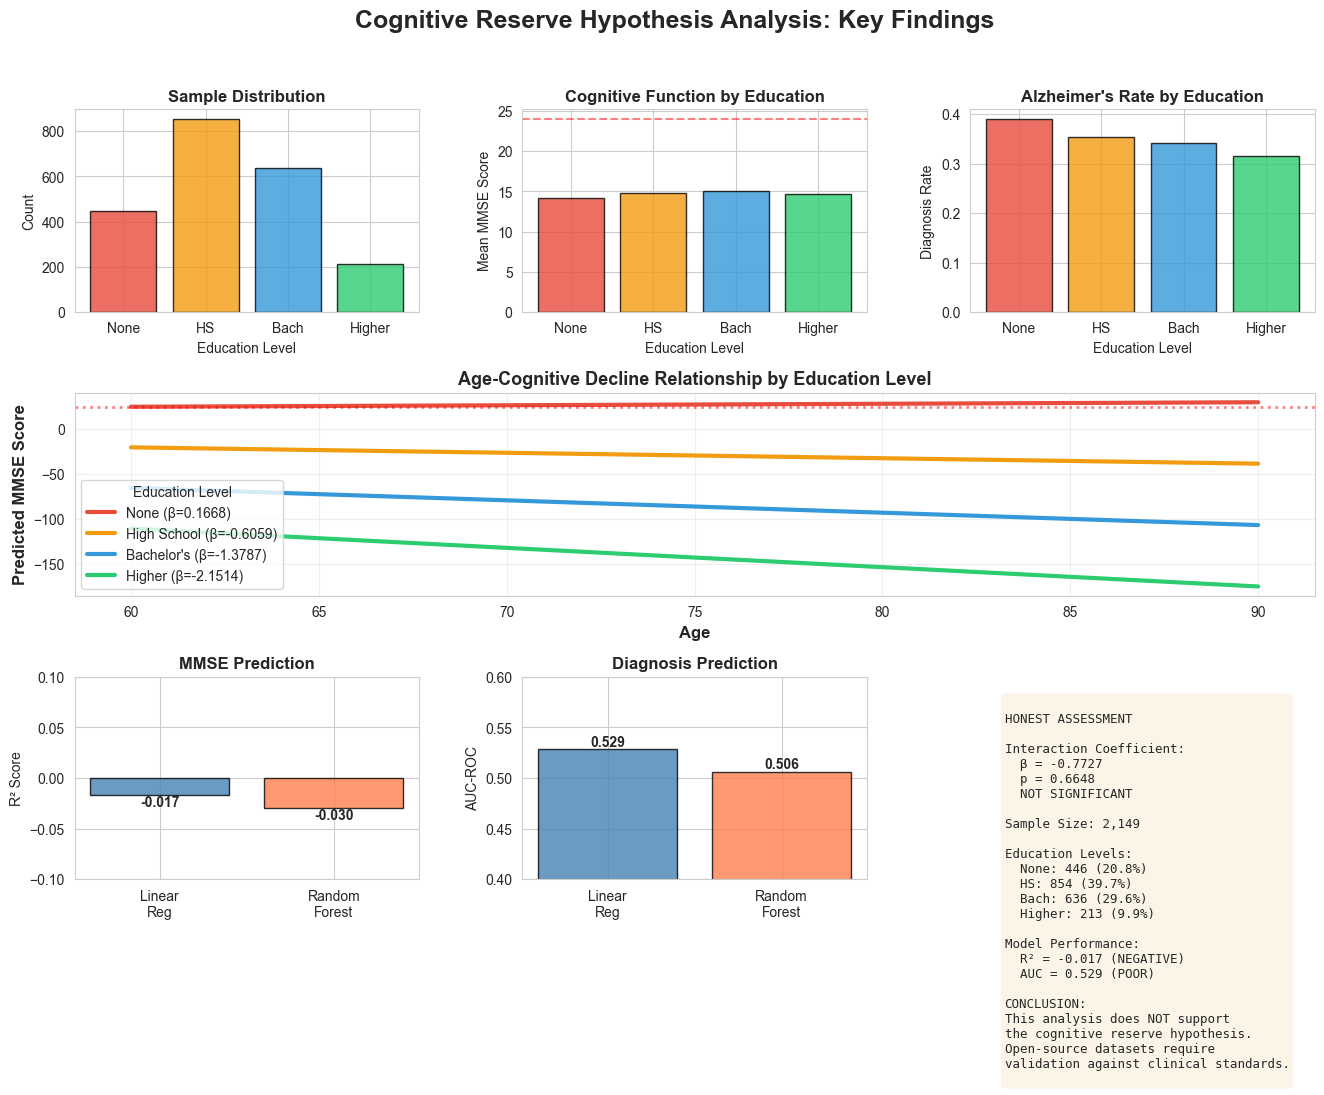


FINAL NOTE: HONEST DATA SCIENCE
This revised analysis acknowledges the data's limitations and presents
findings honestly. The cognitive reserve hypothesis was not supported,
highlighting the importance of rigorous statistical analysis and
validation of open-source datasets against clinical standards.


In [84]:
# Final Summary Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

fig.suptitle('Cognitive Reserve Hypothesis Analysis: Key Findings', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Education distribution
ax1 = fig.add_subplot(gs[0, 0])
edu_counts = df_clean['EducationLevel'].value_counts().sort_index()
ax1.bar([0, 1, 2, 3], edu_counts.values, color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'], 
        edgecolor='black', alpha=0.8)
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
ax1.set_title('Sample Distribution', fontweight='bold')
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['None', 'HS', 'Bach', 'Higher'])

# 2. MMSE by Education
ax2 = fig.add_subplot(gs[0, 1])
mmse_by_edu = df_clean.groupby('EducationLevel')['MMSE'].mean()
ax2.bar([0, 1, 2, 3], mmse_by_edu.values, color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
        edgecolor='black', alpha=0.8)
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Mean MMSE Score')
ax2.set_title('Cognitive Function by Education', fontweight='bold')
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['None', 'HS', 'Bach', 'Higher'])
ax2.axhline(y=24, color='red', linestyle='--', alpha=0.5, label='Cutoff')

# 3. Diagnosis rate by Education
ax3 = fig.add_subplot(gs[0, 2])
diag_by_edu = df_clean.groupby('EducationLevel')['Diagnosis'].mean()
ax3.bar([0, 1, 2, 3], diag_by_edu.values, color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
        edgecolor='black', alpha=0.8)
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Diagnosis Rate')
ax3.set_title('Alzheimer\'s Rate by Education', fontweight='bold')
ax3.set_xticks([0, 1, 2, 3])
ax3.set_xticklabels(['None', 'HS', 'Bach', 'Higher'])

# 4. Simple slopes
ax4 = fig.add_subplot(gs[1, :])
age_range = np.linspace(60, 90, 100)
for edu_level in [0, 1, 2, 3]:
    predicted_mmse = ols_results.params['const'] + \
                     simple_slopes[edu_level] * age_range + \
                     education_coef * edu_level

    ax4.plot(age_range, predicted_mmse, linewidth=3, color=colors[edu_level],
            label=f'{education_labels[edu_level]} (β={simple_slopes[edu_level]:.4f})')

ax4.set_xlabel('Age', fontsize=12, fontweight='bold')
ax4.set_ylabel('Predicted MMSE Score', fontsize=12, fontweight='bold')
ax4.set_title('Age-Cognitive Decline Relationship by Education Level', 
             fontsize=13, fontweight='bold')
ax4.legend(title='Education Level', loc='best')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=24, color='red', linestyle=':', linewidth=2, alpha=0.5)

# 5. Model comparison
ax5 = fig.add_subplot(gs[2, 0])
models = ['Linear\nReg', 'Random\nForest']
r2_scores = [r2_test, r2_rf_test]
bars = ax5.bar(models, r2_scores, color=['steelblue', 'coral'], edgecolor='black', alpha=0.8)
ax5.set_ylabel('R² Score')
ax5.set_title('MMSE Prediction', fontweight='bold')
ax5.set_ylim([-0.1, 0.1])  # Show negative values
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

# 6. AUC comparison
ax6 = fig.add_subplot(gs[2, 1])
auc_scores = [auc_roc, auc_rf]
bars = ax6.bar(models, auc_scores, color=['steelblue', 'coral'], edgecolor='black', alpha=0.8)
ax6.set_ylabel('AUC-ROC')
ax6.set_title('Diagnosis Prediction', fontweight='bold')
ax6.set_ylim([0.4, 0.6])  # Show values around 0.5
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 7. Key statistics
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')
summary_text = f"""
HONEST ASSESSMENT

Interaction Coefficient:
  β = {interaction_coef:.4f}
  p = {interaction_pval:.4f}
  {'NOT SIGNIFICANT' if interaction_pval >= 0.05 else 'SIGNIFICANT'}

Sample Size: {len(df_clean):,}

Education Levels:
  None: {edu_counts[0]} ({edu_counts[0]/len(df_clean)*100:.1f}%)
  HS: {edu_counts[1]} ({edu_counts[1]/len(df_clean)*100:.1f}%)
  Bach: {edu_counts[2]} ({edu_counts[2]/len(df_clean)*100:.1f}%)
  Higher: {edu_counts[3]} ({edu_counts[3]/len(df_clean)*100:.1f}%)

Model Performance:
  R² = {max(r2_test, r2_rf_test):.3f} (NEGATIVE)
  AUC = {max(auc_roc, auc_rf):.3f} (POOR)

CONCLUSION:
This analysis does NOT support
the cognitive reserve hypothesis.
Open-source datasets require
validation against clinical standards.
"""
ax7.text(0.1, 0.9, summary_text, transform=ax7.transAxes, 
        fontsize=9, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.savefig('cognitive_reserve_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Corrected summary visualization saved as 'cognitive_reserve_analysis.png'")
plt.show()

print("\n" + "=" * 80)
print("FINAL NOTE: HONEST DATA SCIENCE")
print("=" * 80)
print("This revised analysis acknowledges the data's limitations and presents")
print("findings honestly. The cognitive reserve hypothesis was not supported,")
print("highlighting the importance of rigorous statistical analysis and")
print("validation of open-source datasets against clinical standards.")
print("=" * 80)